In [ ]:
#@title Mount your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
%matplotlib inline
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls /content/gdrive/Othercomputers/'My Computer'/IFT6135_W25_A2_release/plots

 gpt_training.png  'lstm training.PNG'


In [ ]:
!ls /content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release

checkpointing.py  gpt.py  lstm.py     plotter.py   README.md	     run_exp.py  train.py
data.py		  logs	  main.ipynb  __pycache__  requirements.txt  trainer.py  Upload


In [ ]:
!ls /content/

assignment  gdrive  sample_data


In [ ]:
%cd /content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release

/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release


In [ ]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release


In [ ]:
#@title Link your assignment folder & install requirements
#@markdown Enter the path to the assignment folder in your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
import sys
import os
import shutil
import warnings

folder = "/content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release" #@param {type:"string"}
!ln -Ts "$folder" /content/assignment 2> /dev/null

# Add the assignment folder to Python path
if '/content/assignment' not in sys.path:
  sys.path.insert(0, '/content/assignment')

# Check if CUDA is available
import torch
if not torch.cuda.is_available():
  warnings.warn('CUDA is not available.')

In [ ]:
%matplotlib inline
import warnings

from dataclasses import dataclass
import torch
from torch import optim
from torchvision.datasets import CIFAR10
from torchvision import transforms
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import DataLoader
import time
import os


# LSTM

Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 512
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 10001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 0
exp_name : test
log_dir : /content/gdrive/MyDrive/"Colab Notebooks"/IFT6135_W25_A2_release/logs
seed : 0
verbose : True
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_features=256, out_fea

Training:   0%|          | 2/10001 [00:00<39:56,  4.17it/s]  


Train loss : 3.498929 | Train accuracy : 0.000000 | Test loss : 3.500188 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 101/10001 [00:19<36:37,  4.51it/s]


Train loss : 1.709788 | Train accuracy : 0.045833 | Test loss : 1.768634 | Test accuracy : 0.020790 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:26<10:58, 14.87it/s]


Train loss : 0.919356 | Train accuracy : 0.660417 | Test loss : 2.691753 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 302/10001 [00:33<14:37, 11.05it/s]


Train loss : 0.068711 | Train accuracy : 1.000000 | Test loss : 3.617629 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:40<10:35, 15.12it/s]


Train loss : 0.027985 | Train accuracy : 1.000000 | Test loss : 3.699857 | Test accuracy : 0.004158 | lr = 0.001


Training:   5%|▌         | 502/10001 [00:46<14:10, 11.17it/s]


Train loss : 0.019766 | Train accuracy : 1.000000 | Test loss : 3.644680 | Test accuracy : 0.004158 | lr = 0.001


Training:   6%|▌         | 602/10001 [00:53<12:24, 12.63it/s]


Train loss : 0.015754 | Train accuracy : 1.000000 | Test loss : 3.558300 | Test accuracy : 0.004158 | lr = 0.001


Training:   7%|▋         | 702/10001 [00:59<14:18, 10.83it/s]


Train loss : 0.068084 | Train accuracy : 1.000000 | Test loss : 3.481916 | Test accuracy : 0.006237 | lr = 0.001


Training:   8%|▊         | 802/10001 [01:07<10:34, 14.50it/s]


Train loss : 0.011920 | Train accuracy : 1.000000 | Test loss : 3.403591 | Test accuracy : 0.008316 | lr = 0.001


Training:   9%|▉         | 902/10001 [01:14<14:38, 10.36it/s]


Train loss : 0.011750 | Train accuracy : 1.000000 | Test loss : 3.305902 | Test accuracy : 0.008316 | lr = 0.001


Training:  10%|█         | 1002/10001 [01:20<10:33, 14.20it/s]


Train loss : 0.010616 | Train accuracy : 1.000000 | Test loss : 3.224204 | Test accuracy : 0.006237 | lr = 0.001


Training:  11%|█         | 1102/10001 [01:27<12:11, 12.16it/s]


Train loss : 0.009474 | Train accuracy : 1.000000 | Test loss : 3.137905 | Test accuracy : 0.006237 | lr = 0.001


Training:  12%|█▏        | 1202/10001 [01:33<09:41, 15.14it/s]


Train loss : 0.008489 | Train accuracy : 1.000000 | Test loss : 3.044589 | Test accuracy : 0.012474 | lr = 0.001


Training:  13%|█▎        | 1302/10001 [01:40<15:10,  9.56it/s]


Train loss : 0.007646 | Train accuracy : 1.000000 | Test loss : 2.946004 | Test accuracy : 0.018711 | lr = 0.001


Training:  14%|█▍        | 1402/10001 [01:46<09:26, 15.18it/s]


Train loss : 0.006919 | Train accuracy : 1.000000 | Test loss : 2.843950 | Test accuracy : 0.018711 | lr = 0.001


Training:  15%|█▌        | 1502/10001 [01:53<12:05, 11.71it/s]


Train loss : 0.006290 | Train accuracy : 1.000000 | Test loss : 2.740323 | Test accuracy : 0.022869 | lr = 0.001


Training:  16%|█▌        | 1602/10001 [02:00<09:19, 15.01it/s]


Train loss : 0.005741 | Train accuracy : 1.000000 | Test loss : 2.635437 | Test accuracy : 0.027027 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [02:06<11:50, 11.68it/s]


Train loss : 0.005261 | Train accuracy : 1.000000 | Test loss : 2.529918 | Test accuracy : 0.031185 | lr = 0.001


Training:  18%|█▊        | 1802/10001 [02:13<09:01, 15.15it/s]


Train loss : 0.004836 | Train accuracy : 1.000000 | Test loss : 2.424051 | Test accuracy : 0.047817 | lr = 0.001


Training:  19%|█▉        | 1902/10001 [02:20<11:33, 11.68it/s]


Train loss : 0.004459 | Train accuracy : 1.000000 | Test loss : 2.319604 | Test accuracy : 0.060291 | lr = 0.001


Training:  20%|██        | 2002/10001 [02:26<09:37, 13.86it/s]


Train loss : 0.004124 | Train accuracy : 1.000000 | Test loss : 2.218194 | Test accuracy : 0.066528 | lr = 0.001


Training:  21%|██        | 2102/10001 [02:33<10:53, 12.09it/s]


Train loss : 0.003171 | Train accuracy : 1.000000 | Test loss : 2.174310 | Test accuracy : 0.087318 | lr = 0.001


Training:  22%|██▏       | 2202/10001 [02:39<08:29, 15.30it/s]


Train loss : 0.004083 | Train accuracy : 1.000000 | Test loss : 2.020238 | Test accuracy : 0.101871 | lr = 0.001


Training:  23%|██▎       | 2302/10001 [02:46<11:24, 11.24it/s]


Train loss : 0.004431 | Train accuracy : 1.000000 | Test loss : 1.930550 | Test accuracy : 0.112266 | lr = 0.001


Training:  24%|██▍       | 2402/10001 [02:52<08:49, 14.36it/s]


Train loss : 0.004237 | Train accuracy : 1.000000 | Test loss : 1.849920 | Test accuracy : 0.124740 | lr = 0.001


Training:  25%|██▌       | 2502/10001 [02:59<10:17, 12.14it/s]


Train loss : 0.003977 | Train accuracy : 1.000000 | Test loss : 1.770172 | Test accuracy : 0.145530 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [03:05<08:07, 15.16it/s]


Train loss : 0.003721 | Train accuracy : 1.000000 | Test loss : 1.690326 | Test accuracy : 0.168399 | lr = 0.001


Training:  27%|██▋       | 2702/10001 [03:12<10:25, 11.67it/s]


Train loss : 0.003482 | Train accuracy : 1.000000 | Test loss : 1.610311 | Test accuracy : 0.185031 | lr = 0.001


Training:  28%|██▊       | 2802/10001 [03:18<07:51, 15.26it/s]


Train loss : 0.003261 | Train accuracy : 1.000000 | Test loss : 1.530092 | Test accuracy : 0.205821 | lr = 0.001


Training:  29%|██▉       | 2902/10001 [03:26<09:44, 12.15it/s]


Train loss : 0.003055 | Train accuracy : 1.000000 | Test loss : 1.449255 | Test accuracy : 0.234927 | lr = 0.001


Training:  30%|███       | 3002/10001 [03:32<08:31, 13.68it/s]


Train loss : 0.002866 | Train accuracy : 1.000000 | Test loss : 1.368526 | Test accuracy : 0.272349 | lr = 0.001


Training:  31%|███       | 3102/10001 [03:39<08:14, 13.95it/s]


Train loss : 0.002691 | Train accuracy : 1.000000 | Test loss : 1.289127 | Test accuracy : 0.301455 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [03:45<07:17, 15.53it/s]


Train loss : 0.002528 | Train accuracy : 1.000000 | Test loss : 1.211201 | Test accuracy : 0.336798 | lr = 0.001


Training:  33%|███▎      | 3302/10001 [03:52<08:07, 13.74it/s]


Train loss : 0.002377 | Train accuracy : 1.000000 | Test loss : 1.135021 | Test accuracy : 0.363825 | lr = 0.001


Training:  34%|███▍      | 3402/10001 [03:58<07:13, 15.22it/s]


Train loss : 0.002237 | Train accuracy : 1.000000 | Test loss : 1.061487 | Test accuracy : 0.386694 | lr = 0.001


Training:  35%|███▌      | 3502/10001 [04:05<07:37, 14.21it/s]


Train loss : 0.002107 | Train accuracy : 1.000000 | Test loss : 0.991376 | Test accuracy : 0.424116 | lr = 0.001


Training:  36%|███▌      | 3602/10001 [04:12<07:09, 14.91it/s]


Train loss : 0.001985 | Train accuracy : 1.000000 | Test loss : 0.924900 | Test accuracy : 0.451143 | lr = 0.001


Training:  37%|███▋      | 3702/10001 [04:19<07:10, 14.63it/s]


Train loss : 0.001871 | Train accuracy : 1.000000 | Test loss : 0.861978 | Test accuracy : 0.488566 | lr = 0.001


Training:  38%|███▊      | 3802/10001 [04:25<06:59, 14.78it/s]


Train loss : 0.001765 | Train accuracy : 1.000000 | Test loss : 0.802429 | Test accuracy : 0.530146 | lr = 0.001


Training:  39%|███▉      | 3902/10001 [04:32<07:30, 13.54it/s]


Train loss : 0.001664 | Train accuracy : 1.000000 | Test loss : 0.746051 | Test accuracy : 0.567568 | lr = 0.001


Training:  40%|████      | 4002/10001 [04:38<07:02, 14.19it/s]


Train loss : 0.001571 | Train accuracy : 1.000000 | Test loss : 0.692747 | Test accuracy : 0.609148 | lr = 0.001


Training:  41%|████      | 4102/10001 [04:45<06:41, 14.69it/s]


Train loss : 0.001483 | Train accuracy : 1.000000 | Test loss : 0.642464 | Test accuracy : 0.634096 | lr = 0.001


Training:  42%|████▏     | 4202/10001 [04:51<06:22, 15.18it/s]


Train loss : 0.001400 | Train accuracy : 1.000000 | Test loss : 0.595035 | Test accuracy : 0.650728 | lr = 0.001


Training:  43%|████▎     | 4302/10001 [04:58<06:38, 14.29it/s]


Train loss : 0.001323 | Train accuracy : 1.000000 | Test loss : 0.550171 | Test accuracy : 0.679834 | lr = 0.001


Training:  44%|████▍     | 4402/10001 [05:04<06:13, 15.00it/s]


Train loss : 0.001251 | Train accuracy : 1.000000 | Test loss : 0.507468 | Test accuracy : 0.702703 | lr = 0.001


Training:  45%|████▌     | 4502/10001 [05:11<06:41, 13.71it/s]


Train loss : 0.001184 | Train accuracy : 1.000000 | Test loss : 0.466395 | Test accuracy : 0.721414 | lr = 0.001


Training:  46%|████▌     | 4602/10001 [05:17<05:57, 15.12it/s]


Train loss : 0.001120 | Train accuracy : 1.000000 | Test loss : 0.426365 | Test accuracy : 0.748441 | lr = 0.001


Training:  47%|████▋     | 4702/10001 [05:25<06:05, 14.48it/s]


Train loss : 0.001060 | Train accuracy : 1.000000 | Test loss : 0.387167 | Test accuracy : 0.775468 | lr = 0.001


Training:  48%|████▊     | 4802/10001 [05:31<05:30, 15.73it/s]


Train loss : 0.001004 | Train accuracy : 1.000000 | Test loss : 0.349439 | Test accuracy : 0.787942 | lr = 0.001


Training:  49%|████▉     | 4902/10001 [05:38<06:07, 13.88it/s]


Train loss : 0.000951 | Train accuracy : 1.000000 | Test loss : 0.314035 | Test accuracy : 0.808732 | lr = 0.001


Training:  50%|█████     | 5002/10001 [05:44<05:52, 14.16it/s]


Train loss : 0.000902 | Train accuracy : 1.000000 | Test loss : 0.281362 | Test accuracy : 0.827443 | lr = 0.001


Training:  51%|█████     | 5102/10001 [05:51<06:03, 13.48it/s]


Train loss : 0.000855 | Train accuracy : 1.000000 | Test loss : 0.251530 | Test accuracy : 0.844075 | lr = 0.001


Training:  52%|█████▏    | 5202/10001 [05:57<05:22, 14.89it/s]


Train loss : 0.000810 | Train accuracy : 1.000000 | Test loss : 0.224489 | Test accuracy : 0.862786 | lr = 0.001


Training:  53%|█████▎    | 5302/10001 [06:04<05:24, 14.49it/s]


Train loss : 0.000768 | Train accuracy : 1.000000 | Test loss : 0.200121 | Test accuracy : 0.889813 | lr = 0.001


Training:  54%|█████▍    | 5402/10001 [06:10<05:04, 15.08it/s]


Train loss : 0.000728 | Train accuracy : 1.000000 | Test loss : 0.178318 | Test accuracy : 0.906445 | lr = 0.001


Training:  55%|█████▌    | 5502/10001 [06:17<05:15, 14.27it/s]


Train loss : 0.000689 | Train accuracy : 1.000000 | Test loss : 0.158808 | Test accuracy : 0.920998 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [06:23<04:44, 15.48it/s]


Train loss : 0.000654 | Train accuracy : 1.000000 | Test loss : 0.141050 | Test accuracy : 0.929314 | lr = 0.001


Training:  57%|█████▋    | 5702/10001 [06:30<04:56, 14.49it/s]


Train loss : 0.000620 | Train accuracy : 1.000000 | Test loss : 0.125174 | Test accuracy : 0.941788 | lr = 0.001


Training:  58%|█████▊    | 5802/10001 [06:36<04:33, 15.33it/s]


Train loss : 0.000589 | Train accuracy : 1.000000 | Test loss : 0.110942 | Test accuracy : 0.948025 | lr = 0.001


Training:  59%|█████▉    | 5902/10001 [06:44<05:46, 11.82it/s]


Train loss : 0.000559 | Train accuracy : 1.000000 | Test loss : 0.098078 | Test accuracy : 0.956341 | lr = 0.001


Training:  60%|██████    | 6002/10001 [06:50<04:41, 14.19it/s]


Train loss : 0.000530 | Train accuracy : 1.000000 | Test loss : 0.086404 | Test accuracy : 0.962578 | lr = 0.001


Training:  61%|██████    | 6100/10001 [06:57<05:05, 12.78it/s]


Train loss : 0.000504 | Train accuracy : 1.000000 | Test loss : 0.075806 | Test accuracy : 0.968815 | lr = 0.001


Training:  62%|██████▏   | 6202/10001 [07:03<04:12, 15.04it/s]


Train loss : 0.000478 | Train accuracy : 1.000000 | Test loss : 0.066198 | Test accuracy : 0.970894 | lr = 0.001


Training:  63%|██████▎   | 6302/10001 [07:10<04:06, 15.02it/s]


Train loss : 0.000454 | Train accuracy : 1.000000 | Test loss : 0.057501 | Test accuracy : 0.977131 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [07:16<03:59, 15.02it/s]


Train loss : 0.000431 | Train accuracy : 1.000000 | Test loss : 0.049637 | Test accuracy : 0.979210 | lr = 0.001


Training:  65%|██████▌   | 6502/10001 [07:23<03:57, 14.74it/s]


Train loss : 0.000409 | Train accuracy : 1.000000 | Test loss : 0.042538 | Test accuracy : 0.987526 | lr = 0.001


Training:  66%|██████▌   | 6602/10001 [07:29<03:48, 14.85it/s]


Train loss : 0.000389 | Train accuracy : 1.000000 | Test loss : 0.036162 | Test accuracy : 0.989605 | lr = 0.001


Training:  67%|██████▋   | 6702/10001 [07:36<03:44, 14.67it/s]


Train loss : 0.000369 | Train accuracy : 1.000000 | Test loss : 0.030497 | Test accuracy : 0.995842 | lr = 0.001


Training:  68%|██████▊   | 6802/10001 [07:42<03:39, 14.60it/s]


Train loss : 0.000350 | Train accuracy : 1.000000 | Test loss : 0.025557 | Test accuracy : 0.995842 | lr = 0.001


Training:  69%|██████▉   | 6902/10001 [07:50<03:32, 14.57it/s]


Train loss : 0.000333 | Train accuracy : 1.000000 | Test loss : 0.021362 | Test accuracy : 0.995842 | lr = 0.001


Training:  70%|███████   | 7002/10001 [07:56<03:38, 13.74it/s]


Train loss : 0.000316 | Train accuracy : 1.000000 | Test loss : 0.017892 | Test accuracy : 0.997921 | lr = 0.001


Training:  71%|███████   | 7102/10001 [08:03<03:10, 15.22it/s]


Train loss : 0.000300 | Train accuracy : 1.000000 | Test loss : 0.015062 | Test accuracy : 0.997921 | lr = 0.001


Training:  72%|███████▏  | 7202/10001 [08:09<03:03, 15.28it/s]


Train loss : 0.000285 | Train accuracy : 1.000000 | Test loss : 0.012757 | Test accuracy : 0.997921 | lr = 0.001


Training:  73%|███████▎  | 7302/10001 [08:16<03:02, 14.79it/s]


Train loss : 0.000271 | Train accuracy : 1.000000 | Test loss : 0.010869 | Test accuracy : 0.997921 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [08:22<02:48, 15.44it/s]


Train loss : 0.000257 | Train accuracy : 1.000000 | Test loss : 0.009314 | Test accuracy : 0.997921 | lr = 0.001


Training:  75%|███████▌  | 7502/10001 [08:29<02:54, 14.33it/s]


Train loss : 0.000244 | Train accuracy : 1.000000 | Test loss : 0.008023 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [08:35<02:38, 15.15it/s]


Train loss : 0.000232 | Train accuracy : 1.000000 | Test loss : 0.006938 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7702/10001 [08:42<02:33, 15.01it/s]


Train loss : 0.000221 | Train accuracy : 1.000000 | Test loss : 0.006015 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7802/10001 [08:48<02:25, 15.13it/s]


Train loss : 0.000210 | Train accuracy : 1.000000 | Test loss : 0.005226 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 7902/10001 [08:55<02:22, 14.72it/s]


Train loss : 0.000199 | Train accuracy : 1.000000 | Test loss : 0.004548 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 8002/10001 [09:02<02:19, 14.28it/s]


Train loss : 0.000189 | Train accuracy : 1.000000 | Test loss : 0.003960 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8102/10001 [09:09<02:05, 15.08it/s]


Train loss : 0.000180 | Train accuracy : 1.000000 | Test loss : 0.003444 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8202/10001 [09:15<01:57, 15.33it/s]


Train loss : 0.000171 | Train accuracy : 1.000000 | Test loss : 0.002992 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8302/10001 [09:22<01:53, 14.92it/s]


Train loss : 0.000163 | Train accuracy : 1.000000 | Test loss : 0.002605 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 8402/10001 [09:28<01:44, 15.36it/s]


Train loss : 0.000155 | Train accuracy : 1.000000 | Test loss : 0.002276 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 8502/10001 [09:35<01:37, 15.41it/s]


Train loss : 0.000147 | Train accuracy : 1.000000 | Test loss : 0.001998 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8602/10001 [09:41<01:31, 15.33it/s]


Train loss : 0.000140 | Train accuracy : 1.000000 | Test loss : 0.001762 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8702/10001 [09:48<01:28, 14.60it/s]


Train loss : 0.000133 | Train accuracy : 1.000000 | Test loss : 0.001563 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8802/10001 [09:54<01:37, 12.30it/s]


Train loss : 0.000127 | Train accuracy : 1.000000 | Test loss : 0.001392 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8902/10001 [10:01<01:15, 14.65it/s]


Train loss : 0.000121 | Train accuracy : 1.000000 | Test loss : 0.001247 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 9002/10001 [10:07<01:13, 13.59it/s]


Train loss : 0.000115 | Train accuracy : 1.000000 | Test loss : 0.001121 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9102/10001 [10:14<01:00, 14.88it/s]


Train loss : 0.000109 | Train accuracy : 1.000000 | Test loss : 0.001012 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9202/10001 [10:20<00:52, 15.28it/s]


Train loss : 0.000104 | Train accuracy : 1.000000 | Test loss : 0.000916 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9302/10001 [10:27<00:46, 14.88it/s]


Train loss : 0.000099 | Train accuracy : 1.000000 | Test loss : 0.000832 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [10:34<00:39, 15.06it/s]


Train loss : 0.000094 | Train accuracy : 1.000000 | Test loss : 0.000755 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 9502/10001 [10:41<00:36, 13.80it/s]


Train loss : 0.000090 | Train accuracy : 1.000000 | Test loss : 0.000684 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9602/10001 [10:47<00:26, 15.26it/s]


Train loss : 0.000085 | Train accuracy : 1.000000 | Test loss : 0.000617 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9702/10001 [10:54<00:20, 14.60it/s]


Train loss : 0.000081 | Train accuracy : 1.000000 | Test loss : 0.000557 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9802/10001 [11:00<00:13, 15.04it/s]


Train loss : 0.000077 | Train accuracy : 1.000000 | Test loss : 0.000505 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9902/10001 [11:07<00:06, 14.74it/s]


Train loss : 0.000073 | Train accuracy : 1.000000 | Test loss : 0.000457 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [11:13<00:00, 13.27it/s]


Train loss : 0.000070 | Train accuracy : 1.000000 | Test loss : 0.000415 | Test accuracy : 1.000000 | lr = 0.001

Train loss : 0.000070 | Train accuracy : 1.000000 | Test loss : 0.000415 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [11:13<00:00, 14.85it/s]


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 512
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 10001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 1
exp_name : test
log_dir : /content/gdrive/MyDrive/"Colab Notebooks"/IFT6135_W25_A2_release/logs
seed : 42
verbose : True
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_features=256, out_fe

Training:   0%|          | 2/10001 [00:00<36:51,  4.52it/s]


Train loss : 3.545850 | Train accuracy : 0.012500 | Test loss : 3.543663 | Test accuracy : 0.016632 | lr = 0.001


Training:   1%|          | 102/10001 [00:19<21:52,  7.54it/s]


Train loss : 1.700498 | Train accuracy : 0.070833 | Test loss : 1.766537 | Test accuracy : 0.008316 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:26<11:02, 14.80it/s]


Train loss : 0.931143 | Train accuracy : 0.652083 | Test loss : 2.596893 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 302/10001 [00:33<10:32, 15.35it/s]


Train loss : 0.076418 | Train accuracy : 1.000000 | Test loss : 3.446685 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:39<10:22, 15.43it/s]


Train loss : 0.028598 | Train accuracy : 1.000000 | Test loss : 3.530227 | Test accuracy : 0.004158 | lr = 0.001


Training:   5%|▌         | 502/10001 [00:46<10:51, 14.59it/s]


Train loss : 0.019781 | Train accuracy : 1.000000 | Test loss : 3.483594 | Test accuracy : 0.006237 | lr = 0.001


Training:   6%|▌         | 602/10001 [00:52<10:38, 14.72it/s]


Train loss : 0.015806 | Train accuracy : 1.000000 | Test loss : 3.406223 | Test accuracy : 0.006237 | lr = 0.001


Training:   7%|▋         | 702/10001 [00:59<10:14, 15.13it/s]


Train loss : 0.013214 | Train accuracy : 1.000000 | Test loss : 3.319659 | Test accuracy : 0.010395 | lr = 0.001


Training:   8%|▊         | 802/10001 [01:05<10:05, 15.19it/s]


Train loss : 0.012235 | Train accuracy : 1.000000 | Test loss : 3.262285 | Test accuracy : 0.012474 | lr = 0.001


Training:   9%|▉         | 902/10001 [01:13<10:11, 14.87it/s]


Train loss : 0.011374 | Train accuracy : 1.000000 | Test loss : 3.162269 | Test accuracy : 0.012474 | lr = 0.001


Training:  10%|█         | 1002/10001 [01:19<10:21, 14.49it/s]


Train loss : 0.010835 | Train accuracy : 1.000000 | Test loss : 3.082508 | Test accuracy : 0.018711 | lr = 0.001


Training:  11%|█         | 1102/10001 [01:26<09:48, 15.12it/s]


Train loss : 0.009788 | Train accuracy : 1.000000 | Test loss : 3.012326 | Test accuracy : 0.024948 | lr = 0.001


Training:  12%|█▏        | 1202/10001 [01:32<09:42, 15.10it/s]


Train loss : 0.008816 | Train accuracy : 1.000000 | Test loss : 2.942335 | Test accuracy : 0.027027 | lr = 0.001


Training:  13%|█▎        | 1302/10001 [01:39<09:36, 15.09it/s]


Train loss : 0.007980 | Train accuracy : 1.000000 | Test loss : 2.871224 | Test accuracy : 0.033264 | lr = 0.001


Training:  14%|█▍        | 1402/10001 [01:45<11:40, 12.27it/s]


Train loss : 0.007259 | Train accuracy : 1.000000 | Test loss : 2.799117 | Test accuracy : 0.039501 | lr = 0.001


Training:  15%|█▌        | 1502/10001 [01:52<10:25, 13.58it/s]


Train loss : 0.006632 | Train accuracy : 1.000000 | Test loss : 2.725866 | Test accuracy : 0.045738 | lr = 0.001


Training:  16%|█▌        | 1602/10001 [01:58<09:11, 15.23it/s]


Train loss : 0.006080 | Train accuracy : 1.000000 | Test loss : 2.650656 | Test accuracy : 0.049896 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [02:05<09:17, 14.90it/s]


Train loss : 0.005591 | Train accuracy : 1.000000 | Test loss : 2.573135 | Test accuracy : 0.047817 | lr = 0.001


Training:  18%|█▊        | 1802/10001 [02:12<09:10, 14.88it/s]


Train loss : 0.005155 | Train accuracy : 1.000000 | Test loss : 2.493232 | Test accuracy : 0.060291 | lr = 0.001


Training:  19%|█▉        | 1902/10001 [02:19<08:48, 15.33it/s]


Train loss : 0.004765 | Train accuracy : 1.000000 | Test loss : 2.411680 | Test accuracy : 0.062370 | lr = 0.001


Training:  20%|██        | 2002/10001 [02:25<11:35, 11.50it/s]


Train loss : 0.004414 | Train accuracy : 1.000000 | Test loss : 2.329278 | Test accuracy : 0.076923 | lr = 0.001


Training:  21%|██        | 2102/10001 [02:32<08:40, 15.17it/s]


Train loss : 0.004095 | Train accuracy : 1.000000 | Test loss : 2.246395 | Test accuracy : 0.079002 | lr = 0.001


Training:  22%|██▏       | 2202/10001 [02:38<08:35, 15.12it/s]


Train loss : 0.003807 | Train accuracy : 1.000000 | Test loss : 2.163094 | Test accuracy : 0.093555 | lr = 0.001


Training:  23%|██▎       | 2302/10001 [02:45<08:36, 14.91it/s]


Train loss : 0.003546 | Train accuracy : 1.000000 | Test loss : 2.080505 | Test accuracy : 0.118503 | lr = 0.001


Training:  24%|██▍       | 2402/10001 [02:51<08:22, 15.13it/s]


Train loss : 0.003308 | Train accuracy : 1.000000 | Test loss : 1.999461 | Test accuracy : 0.139293 | lr = 0.001


Training:  25%|██▌       | 2502/10001 [02:58<08:20, 14.98it/s]


Train loss : 0.003091 | Train accuracy : 1.000000 | Test loss : 1.920639 | Test accuracy : 0.155925 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [03:05<08:24, 14.66it/s]


Train loss : 0.002894 | Train accuracy : 1.000000 | Test loss : 1.844925 | Test accuracy : 0.168399 | lr = 0.001


Training:  27%|██▋       | 2702/10001 [03:12<08:08, 14.96it/s]


Train loss : 0.001819 | Train accuracy : 1.000000 | Test loss : 1.783685 | Test accuracy : 0.203742 | lr = 0.001


Training:  28%|██▊       | 2802/10001 [03:18<08:15, 14.54it/s]


Train loss : 0.003365 | Train accuracy : 1.000000 | Test loss : 1.677170 | Test accuracy : 0.218295 | lr = 0.001


Training:  29%|██▉       | 2902/10001 [03:25<07:53, 14.98it/s]


Train loss : 0.003680 | Train accuracy : 1.000000 | Test loss : 1.610034 | Test accuracy : 0.230769 | lr = 0.001


Training:  30%|███       | 3002/10001 [03:31<08:15, 14.13it/s]


Train loss : 0.003549 | Train accuracy : 1.000000 | Test loss : 1.549403 | Test accuracy : 0.249480 | lr = 0.001


Training:  31%|███       | 3102/10001 [03:38<07:38, 15.04it/s]


Train loss : 0.003351 | Train accuracy : 1.000000 | Test loss : 1.488590 | Test accuracy : 0.268191 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [03:44<07:16, 15.57it/s]


Train loss : 0.003152 | Train accuracy : 1.000000 | Test loss : 1.427096 | Test accuracy : 0.278586 | lr = 0.001


Training:  33%|███▎      | 3302/10001 [03:51<07:14, 15.41it/s]


Train loss : 0.002965 | Train accuracy : 1.000000 | Test loss : 1.365274 | Test accuracy : 0.286902 | lr = 0.001


Training:  34%|███▍      | 3402/10001 [03:57<07:23, 14.88it/s]


Train loss : 0.002791 | Train accuracy : 1.000000 | Test loss : 1.303635 | Test accuracy : 0.311850 | lr = 0.001


Training:  35%|███▌      | 3502/10001 [04:04<07:23, 14.66it/s]


Train loss : 0.002629 | Train accuracy : 1.000000 | Test loss : 1.242685 | Test accuracy : 0.353430 | lr = 0.001


Training:  36%|███▌      | 3602/10001 [04:11<07:08, 14.93it/s]


Train loss : 0.002478 | Train accuracy : 1.000000 | Test loss : 1.182780 | Test accuracy : 0.376299 | lr = 0.001


Training:  37%|███▋      | 3702/10001 [04:18<07:04, 14.82it/s]


Train loss : 0.002338 | Train accuracy : 1.000000 | Test loss : 1.124051 | Test accuracy : 0.397089 | lr = 0.001


Training:  38%|███▊      | 3800/10001 [04:24<07:06, 14.55it/s]


Train loss : 0.002206 | Train accuracy : 1.000000 | Test loss : 1.066499 | Test accuracy : 0.426195 | lr = 0.001


Training:  39%|███▉      | 3902/10001 [04:31<06:43, 15.11it/s]


Train loss : 0.002082 | Train accuracy : 1.000000 | Test loss : 1.010088 | Test accuracy : 0.444906 | lr = 0.001


Training:  40%|████      | 4002/10001 [04:37<07:06, 14.07it/s]


Train loss : 0.001966 | Train accuracy : 1.000000 | Test loss : 0.954829 | Test accuracy : 0.471933 | lr = 0.001


Training:  41%|████      | 4102/10001 [04:44<06:27, 15.23it/s]


Train loss : 0.001857 | Train accuracy : 1.000000 | Test loss : 0.900796 | Test accuracy : 0.505198 | lr = 0.001


Training:  42%|████▏     | 4202/10001 [04:50<06:26, 15.02it/s]


Train loss : 0.001755 | Train accuracy : 1.000000 | Test loss : 0.848104 | Test accuracy : 0.528067 | lr = 0.001


Training:  43%|████▎     | 4302/10001 [04:58<06:21, 14.92it/s]


Train loss : 0.001658 | Train accuracy : 1.000000 | Test loss : 0.796939 | Test accuracy : 0.540541 | lr = 0.001


Training:  44%|████▍     | 4402/10001 [05:04<06:09, 15.15it/s]


Train loss : 0.001568 | Train accuracy : 1.000000 | Test loss : 0.747443 | Test accuracy : 0.571726 | lr = 0.001


Training:  45%|████▍     | 4500/10001 [05:10<06:12, 14.76it/s]


Train loss : 0.001482 | Train accuracy : 1.000000 | Test loss : 0.699657 | Test accuracy : 0.596674 | lr = 0.001


Training:  46%|████▌     | 4602/10001 [05:17<06:08, 14.66it/s]


Train loss : 0.001403 | Train accuracy : 1.000000 | Test loss : 0.653516 | Test accuracy : 0.621622 | lr = 0.001


Training:  47%|████▋     | 4702/10001 [05:24<05:44, 15.37it/s]


Train loss : 0.001328 | Train accuracy : 1.000000 | Test loss : 0.608900 | Test accuracy : 0.642412 | lr = 0.001


Training:  48%|████▊     | 4802/10001 [05:30<05:49, 14.88it/s]


Train loss : 0.001257 | Train accuracy : 1.000000 | Test loss : 0.565780 | Test accuracy : 0.650728 | lr = 0.001


Training:  49%|████▉     | 4902/10001 [05:37<05:42, 14.87it/s]


Train loss : 0.001191 | Train accuracy : 1.000000 | Test loss : 0.524487 | Test accuracy : 0.681913 | lr = 0.001


Training:  50%|█████     | 5002/10001 [05:43<06:01, 13.85it/s]


Train loss : 0.001128 | Train accuracy : 1.000000 | Test loss : 0.485475 | Test accuracy : 0.704782 | lr = 0.001


Training:  51%|█████     | 5102/10001 [05:50<05:23, 15.15it/s]


Train loss : 0.001069 | Train accuracy : 1.000000 | Test loss : 0.448891 | Test accuracy : 0.735967 | lr = 0.001


Training:  52%|█████▏    | 5202/10001 [05:57<05:15, 15.19it/s]


Train loss : 0.001014 | Train accuracy : 1.000000 | Test loss : 0.414690 | Test accuracy : 0.752599 | lr = 0.001


Training:  53%|█████▎    | 5302/10001 [06:04<05:12, 15.05it/s]


Train loss : 0.000961 | Train accuracy : 1.000000 | Test loss : 0.382758 | Test accuracy : 0.765073 | lr = 0.001


Training:  54%|█████▍    | 5402/10001 [06:10<05:08, 14.92it/s]


Train loss : 0.000912 | Train accuracy : 1.000000 | Test loss : 0.352854 | Test accuracy : 0.783784 | lr = 0.001


Training:  55%|█████▌    | 5502/10001 [06:17<05:01, 14.93it/s]


Train loss : 0.000865 | Train accuracy : 1.000000 | Test loss : 0.324475 | Test accuracy : 0.804574 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [06:23<06:10, 11.89it/s]


Train loss : 0.000821 | Train accuracy : 1.000000 | Test loss : 0.296898 | Test accuracy : 0.814969 | lr = 0.001


Training:  57%|█████▋    | 5702/10001 [06:30<04:56, 14.50it/s]


Train loss : 0.000780 | Train accuracy : 1.000000 | Test loss : 0.270292 | Test accuracy : 0.831601 | lr = 0.001


Training:  58%|█████▊    | 5800/10001 [06:36<04:54, 14.28it/s]


Train loss : 0.000740 | Train accuracy : 1.000000 | Test loss : 0.245897 | Test accuracy : 0.848233 | lr = 0.001


Training:  59%|█████▉    | 5902/10001 [06:44<04:38, 14.70it/s]


Train loss : 0.000703 | Train accuracy : 1.000000 | Test loss : 0.223933 | Test accuracy : 0.852391 | lr = 0.001


Training:  60%|██████    | 6002/10001 [06:50<04:49, 13.82it/s]


Train loss : 0.000669 | Train accuracy : 1.000000 | Test loss : 0.204015 | Test accuracy : 0.871102 | lr = 0.001


Training:  61%|██████    | 6102/10001 [06:58<04:19, 15.03it/s]


Train loss : 0.000636 | Train accuracy : 1.000000 | Test loss : 0.185788 | Test accuracy : 0.883576 | lr = 0.001


Training:  62%|██████▏   | 6202/10001 [07:04<04:12, 15.02it/s]


Train loss : 0.000604 | Train accuracy : 1.000000 | Test loss : 0.168925 | Test accuracy : 0.893971 | lr = 0.001


Training:  63%|██████▎   | 6302/10001 [07:11<04:10, 14.79it/s]


Train loss : 0.000574 | Train accuracy : 1.000000 | Test loss : 0.153043 | Test accuracy : 0.900208 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [07:17<04:05, 14.68it/s]


Train loss : 0.000546 | Train accuracy : 1.000000 | Test loss : 0.138115 | Test accuracy : 0.912682 | lr = 0.001


Training:  65%|██████▌   | 6502/10001 [07:25<03:58, 14.68it/s]


Train loss : 0.000520 | Train accuracy : 1.000000 | Test loss : 0.124553 | Test accuracy : 0.923077 | lr = 0.001


Training:  66%|██████▌   | 6602/10001 [07:31<04:36, 12.30it/s]


Train loss : 0.000494 | Train accuracy : 1.000000 | Test loss : 0.112321 | Test accuracy : 0.931393 | lr = 0.001


Training:  67%|██████▋   | 6702/10001 [07:38<03:41, 14.91it/s]


Train loss : 0.000470 | Train accuracy : 1.000000 | Test loss : 0.101224 | Test accuracy : 0.939709 | lr = 0.001


Training:  68%|██████▊   | 6802/10001 [07:45<04:42, 11.31it/s]


Train loss : 0.000447 | Train accuracy : 1.000000 | Test loss : 0.091062 | Test accuracy : 0.950104 | lr = 0.001


Training:  69%|██████▉   | 6902/10001 [07:52<03:24, 15.12it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Test loss : 0.081638 | Test accuracy : 0.958420 | lr = 0.001


Training:  70%|██████▉   | 7000/10001 [07:58<05:23,  9.28it/s]


Train loss : 0.000405 | Train accuracy : 1.000000 | Test loss : 0.072861 | Test accuracy : 0.962578 | lr = 0.001


Training:  71%|███████   | 7102/10001 [08:06<03:15, 14.82it/s]


Train loss : 0.000385 | Train accuracy : 1.000000 | Test loss : 0.064761 | Test accuracy : 0.966736 | lr = 0.001


Training:  72%|███████▏  | 7202/10001 [08:12<04:35, 10.14it/s]


Train loss : 0.000367 | Train accuracy : 1.000000 | Test loss : 0.057344 | Test accuracy : 0.975052 | lr = 0.001


Training:  73%|███████▎  | 7302/10001 [08:19<03:03, 14.70it/s]


Train loss : 0.000349 | Train accuracy : 1.000000 | Test loss : 0.050594 | Test accuracy : 0.983368 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [08:26<04:13, 10.25it/s]


Train loss : 0.000332 | Train accuracy : 1.000000 | Test loss : 0.044469 | Test accuracy : 0.987526 | lr = 0.001


Training:  75%|███████▌  | 7502/10001 [08:32<03:13, 12.92it/s]


Train loss : 0.000316 | Train accuracy : 1.000000 | Test loss : 0.038900 | Test accuracy : 0.993763 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [08:39<03:49, 10.45it/s]


Train loss : 0.000300 | Train accuracy : 1.000000 | Test loss : 0.033844 | Test accuracy : 0.995842 | lr = 0.001


Training:  77%|███████▋  | 7702/10001 [08:46<02:33, 15.01it/s]


Train loss : 0.000286 | Train accuracy : 1.000000 | Test loss : 0.029310 | Test accuracy : 0.997921 | lr = 0.001


Training:  78%|███████▊  | 7802/10001 [08:53<03:36, 10.16it/s]


Train loss : 0.000272 | Train accuracy : 1.000000 | Test loss : 0.025356 | Test accuracy : 0.997921 | lr = 0.001


Training:  79%|███████▉  | 7902/10001 [08:59<02:26, 14.29it/s]


Train loss : 0.000259 | Train accuracy : 1.000000 | Test loss : 0.021942 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|████████  | 8002/10001 [09:07<03:39,  9.10it/s]


Train loss : 0.000247 | Train accuracy : 1.000000 | Test loss : 0.018982 | Test accuracy : 0.997921 | lr = 0.001


Training:  81%|████████  | 8102/10001 [09:13<02:09, 14.63it/s]


Train loss : 0.000235 | Train accuracy : 1.000000 | Test loss : 0.016417 | Test accuracy : 0.997921 | lr = 0.001


Training:  82%|████████▏ | 8202/10001 [09:20<02:49, 10.63it/s]


Train loss : 0.000224 | Train accuracy : 1.000000 | Test loss : 0.014197 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8302/10001 [09:27<01:53, 14.95it/s]


Train loss : 0.000213 | Train accuracy : 1.000000 | Test loss : 0.012274 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 8402/10001 [09:34<01:52, 14.26it/s]


Train loss : 0.000203 | Train accuracy : 1.000000 | Test loss : 0.010607 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 8502/10001 [09:40<01:38, 15.16it/s]


Train loss : 0.000193 | Train accuracy : 1.000000 | Test loss : 0.009161 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8602/10001 [09:47<01:37, 14.40it/s]


Train loss : 0.000184 | Train accuracy : 1.000000 | Test loss : 0.007904 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8702/10001 [09:53<01:26, 15.06it/s]


Train loss : 0.000175 | Train accuracy : 1.000000 | Test loss : 0.006815 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8802/10001 [10:01<01:31, 13.13it/s]


Train loss : 0.000167 | Train accuracy : 1.000000 | Test loss : 0.005880 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8902/10001 [10:07<01:16, 14.45it/s]


Train loss : 0.000159 | Train accuracy : 1.000000 | Test loss : 0.005087 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 9002/10001 [10:14<01:13, 13.64it/s]


Train loss : 0.000151 | Train accuracy : 1.000000 | Test loss : 0.004408 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9102/10001 [10:20<01:02, 14.37it/s]


Train loss : 0.000144 | Train accuracy : 1.000000 | Test loss : 0.003825 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9202/10001 [10:27<00:53, 14.85it/s]


Train loss : 0.000137 | Train accuracy : 1.000000 | Test loss : 0.003324 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9302/10001 [10:34<00:47, 14.71it/s]


Train loss : 0.000131 | Train accuracy : 1.000000 | Test loss : 0.002895 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [10:41<00:41, 14.43it/s]


Train loss : 0.000124 | Train accuracy : 1.000000 | Test loss : 0.002528 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 9502/10001 [10:47<00:33, 14.68it/s]


Train loss : 0.000118 | Train accuracy : 1.000000 | Test loss : 0.002213 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9602/10001 [10:54<00:27, 14.40it/s]


Train loss : 0.000113 | Train accuracy : 1.000000 | Test loss : 0.001941 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9702/10001 [11:01<00:20, 14.69it/s]


Train loss : 0.000107 | Train accuracy : 1.000000 | Test loss : 0.001705 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9802/10001 [11:08<00:15, 12.52it/s]


Train loss : 0.000102 | Train accuracy : 1.000000 | Test loss : 0.001499 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9902/10001 [11:14<00:06, 15.12it/s]


Train loss : 0.000097 | Train accuracy : 1.000000 | Test loss : 0.001319 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [11:22<00:00, 12.70it/s]


Train loss : 0.000093 | Train accuracy : 1.000000 | Test loss : 0.001162 | Test accuracy : 1.000000 | lr = 0.001

Train loss : 0.000093 | Train accuracy : 1.000000 | Test loss : 0.001161 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [11:22<00:00, 14.66it/s]


Model 1/2
/content/gdrive/MyDrive/"Colab Notebooks"/IFT6135_W25_A2_release/logs/6
Model 2/2
/content/gdrive/MyDrive/"Colab Notebooks"/IFT6135_W25_A2_release/logs/7


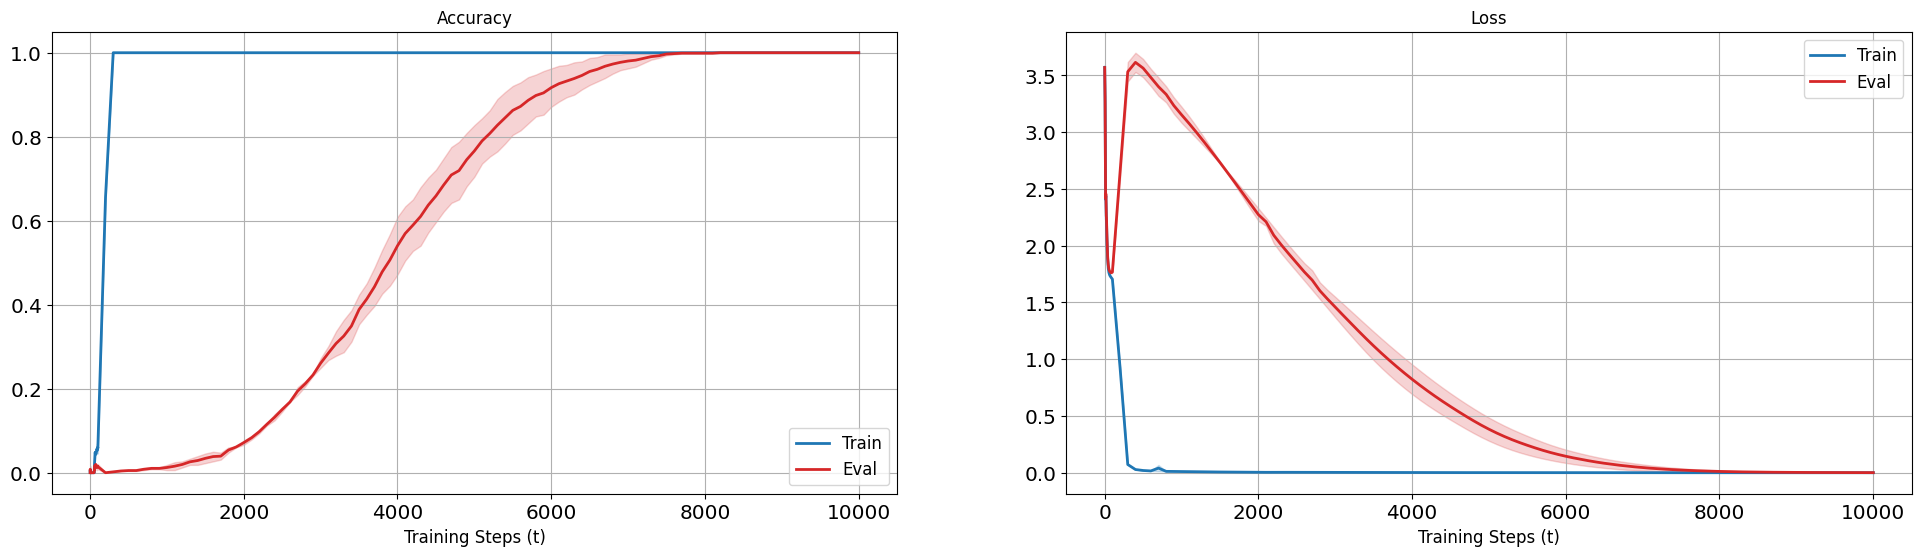

In [ ]:
import torch
from train import Arguments, train, train_m_models
from plotter import plot_loss_accs

args=Arguments()

# Data
args.p=31
args.operator = "+" # ["+", "-", "*", "/"]
args.r_train = .5
args.operation_orders = 2 # 2, 3 or [2, 3]
args.train_batch_size = 512
args.eval_batch_size = 2**12
args.num_workers = 0

# Model
args.model = 'lstm'  # [lstm, gpt]
args.num_heads = 4
args.num_layers = 2
args.embedding_size = 2**7
args.hidden_size = 2**7
args.dropout = 0.0
args.share_embeddings = False
args.bias_classifier = True

# Optimization
args.optimizer = 'adamw'  # [sgd, momentum, adam, adamw]
args.lr = 1e-3
args.weight_decay = 1e-0

# Training
args.n_steps = 10**4 + 1
args.eval_first = 10**2
args.eval_period = 10**2
args.print_step= 10**2
args.save_model_step = 10**3
args.save_statistic_step = 10**3

# Experiment & Miscellaneous
args.device = "cuda" if torch.cuda.is_available() else "cpu"
args.exp_id = 0
args.exp_name = "test"
args.log_dir = '../logs'
args.seed = 42
args.verbose = True

## Train a single model (one seed)
all_metrics, checkpoint_path = train(args)
## all_metrics contains the training/test loss/accuracies, training steps, etc
plot_loss_accs(all_metrics, multiple_runs=False, log_x=False, log_y=False, fileName=args.exp_name, filePath=None, show=True)

## Train multiple models (multiple seeds)
all_models_per_trials, all_metrics, all_checkpoint_paths = train_m_models(args, M=2, seeds=[0, 42])
plot_loss_accs(all_metrics, multiple_runs=True, log_x=False, log_y=False, fileName=args.exp_name, filePath=None, show=True)

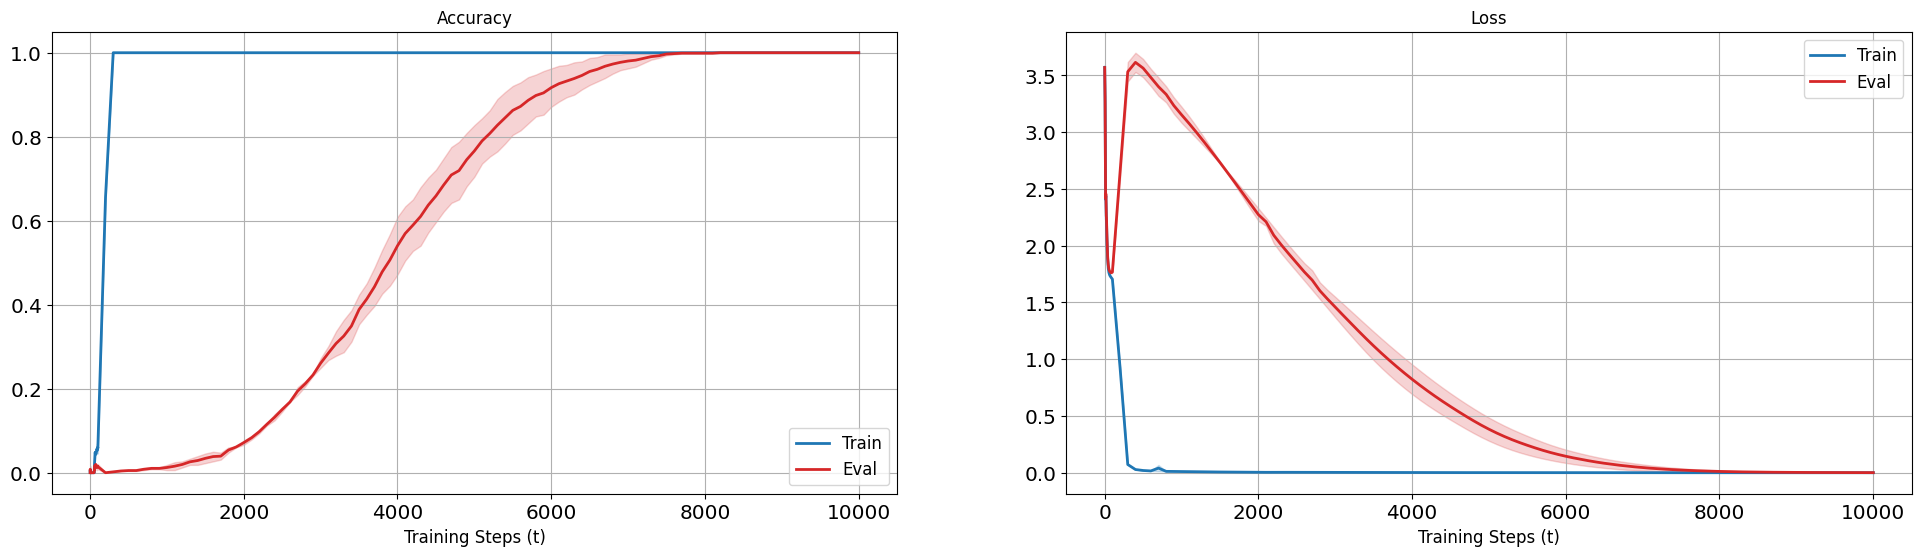

In [ ]:
from plotter import plot_loss_accs



## For a multiple run
plot_loss_accs(LSTM_all_metrics, multiple_runs=True, log_x=False, log_y=False, fileName=args.exp_name, filePath=None, show=True)

In [ ]:
from checkpointing import get_extrema_performance_steps, get_extrema_performance_steps_per_trials

## For a multiple run
LSTM_metrics = get_extrema_performance_steps(LSTM_all_metrics)
LSTM_extrema_performances = get_extrema_performance_steps_per_trials(LSTM_all_metrics)


In [ ]:
print(LSTM_metrics)

{'min_train_loss': [3.5512442588806152, 3.4989285469055176, 3.4439618587493896, 3.381195545196533, 3.3059115409851074, 3.213597297668457, 3.1001665592193604, 2.9632163047790527, 2.804169178009033, 2.634758710861206, 2.483311176300049, 2.3937313556671143, 2.3946993350982666, 2.4395694732666016, 2.464014768600464, 2.4516994953155518, 2.4079291820526123, 2.346384286880493, 2.283972978591919, 2.2387237548828125, 2.2180206775665283, 2.2154321670532227, 2.217456579208374, 2.212427854537964, 2.194969892501831, 2.165874481201172, 2.1302056312561035, 2.094911575317383, 2.066028356552124, 2.045966863632202, 2.032397508621216, 2.0199787616729736, 2.0039916038513184, 1.9831293821334839, 1.9596587419509888, 1.9374232292175293, 1.9193750619888306, 1.9061269760131836, 1.896053433418274, 1.8866013288497925, 1.8759385347366333, 1.8638591766357422, 1.851452350616455, 1.8400750160217285, 1.8305230140686035, 1.8228135108947754, 1.8164294958114624, 1.8107056617736816, 1.8051341772079468, 1.799500823020935,

In [ ]:
print(LSTM_extrema_performances)

{'min_train_loss': np.float64(8.132064613164403e-05), 'min_train_loss_std': np.float64(1.1462758266134188e-05), 'min_train_loss_step': np.float64(10001.0), 'min_train_loss_step_std': np.float64(0.0), 'min_test_loss': np.float64(0.0007876624440541491), 'min_test_loss_std': np.float64(0.00037315012014005333), 'min_test_loss_step': np.float64(10001.0), 'min_test_loss_step_std': np.float64(0.0), 'max_train_accuracy': np.float32(1.0), 'max_train_accuracy_std': np.float32(0.0), 'max_train_accuracy_step': np.float64(300.0), 'max_train_accuracy_step_std': np.float64(0.0), 'max_test_accuracy': np.float32(1.0), 'max_test_accuracy_std': np.float32(0.0), 'max_test_accuracy_step': np.float64(7850.0), 'max_test_accuracy_step_std': np.float64(350.0), 'T_max_indexes': [202, 202]}


#GPT

Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 512
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 10001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 0
exp_name : test
log_dir : /content/gdrive/MyDrive/"Colab Notebooks"/IFT6135_W25_A2_release/logs
seed : 0
verbose : True
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_features=128, bias=True)


Training:   0%|          | 1/10001 [00:00<31:15,  5.33it/s]


Train loss : 3.048666 | Train accuracy : 0.000000 | Test loss : 3.032010 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 100/10001 [00:21<57:49,  2.85it/s]


Train loss : 0.050961 | Train accuracy : 1.000000 | Test loss : 1.972426 | Test accuracy : 0.424116 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:27<10:47, 15.15it/s]


Train loss : 0.008873 | Train accuracy : 1.000000 | Test loss : 1.861526 | Test accuracy : 0.453222 | lr = 0.001


Training:   3%|▎         | 302/10001 [00:34<14:06, 11.45it/s]


Train loss : 0.007037 | Train accuracy : 1.000000 | Test loss : 1.734828 | Test accuracy : 0.457381 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:40<10:02, 15.92it/s]


Train loss : 0.006034 | Train accuracy : 1.000000 | Test loss : 1.644231 | Test accuracy : 0.459459 | lr = 0.001


Training:   5%|▍         | 500/10001 [00:46<14:45, 10.73it/s]


Train loss : 0.004833 | Train accuracy : 1.000000 | Test loss : 1.679045 | Test accuracy : 0.459459 | lr = 0.001


Training:   6%|▌         | 602/10001 [00:53<09:48, 15.98it/s]


Train loss : 0.005104 | Train accuracy : 1.000000 | Test loss : 1.602079 | Test accuracy : 0.459459 | lr = 0.001


Training:   7%|▋         | 702/10001 [00:59<13:04, 11.85it/s]


Train loss : 0.004700 | Train accuracy : 1.000000 | Test loss : 1.564201 | Test accuracy : 0.459459 | lr = 0.001


Training:   8%|▊         | 802/10001 [01:05<11:41, 13.12it/s]


Train loss : 0.003541 | Train accuracy : 1.000000 | Test loss : 1.630303 | Test accuracy : 0.459459 | lr = 0.001


Training:   9%|▉         | 902/10001 [01:11<09:37, 15.75it/s]


Train loss : 0.003922 | Train accuracy : 1.000000 | Test loss : 1.568088 | Test accuracy : 0.459459 | lr = 0.001


Training:  10%|█         | 1002/10001 [01:18<10:23, 14.44it/s]


Train loss : 0.003678 | Train accuracy : 1.000000 | Test loss : 1.638791 | Test accuracy : 0.459459 | lr = 0.001


Training:  11%|█         | 1102/10001 [01:24<09:26, 15.71it/s]


Train loss : 0.003159 | Train accuracy : 1.000000 | Test loss : 1.580974 | Test accuracy : 0.459459 | lr = 0.001


Training:  12%|█▏        | 1202/10001 [01:30<09:27, 15.51it/s]


Train loss : 0.026921 | Train accuracy : 1.000000 | Test loss : 1.649367 | Test accuracy : 0.444906 | lr = 0.001


Training:  13%|█▎        | 1302/10001 [01:36<09:15, 15.66it/s]


Train loss : 0.002468 | Train accuracy : 1.000000 | Test loss : 1.630075 | Test accuracy : 0.459459 | lr = 0.001


Training:  14%|█▍        | 1402/10001 [01:43<09:32, 15.03it/s]


Train loss : 0.002732 | Train accuracy : 1.000000 | Test loss : 1.587624 | Test accuracy : 0.459459 | lr = 0.001


Training:  15%|█▌        | 1502/10001 [01:49<08:53, 15.93it/s]


Train loss : 0.001947 | Train accuracy : 1.000000 | Test loss : 1.687481 | Test accuracy : 0.459459 | lr = 0.001


Training:  16%|█▌        | 1602/10001 [01:56<08:37, 16.22it/s]


Train loss : 0.002359 | Train accuracy : 1.000000 | Test loss : 1.623190 | Test accuracy : 0.463617 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [02:01<08:45, 15.79it/s]


Train loss : 0.001726 | Train accuracy : 1.000000 | Test loss : 1.707169 | Test accuracy : 0.461538 | lr = 0.001


Training:  18%|█▊        | 1802/10001 [02:08<08:57, 15.27it/s]


Train loss : 0.002284 | Train accuracy : 1.000000 | Test loss : 1.638562 | Test accuracy : 0.461538 | lr = 0.001


Training:  19%|█▉        | 1902/10001 [02:14<08:39, 15.60it/s]


Train loss : 0.001552 | Train accuracy : 1.000000 | Test loss : 1.728768 | Test accuracy : 0.459459 | lr = 0.001


Training:  20%|██        | 2002/10001 [02:21<12:14, 10.88it/s]


Train loss : 0.070757 | Train accuracy : 1.000000 | Test loss : 1.654392 | Test accuracy : 0.444906 | lr = 0.001


Training:  21%|██        | 2102/10001 [02:27<08:46, 15.00it/s]


Train loss : 0.001401 | Train accuracy : 1.000000 | Test loss : 1.715087 | Test accuracy : 0.459459 | lr = 0.001


Training:  22%|██▏       | 2202/10001 [02:33<11:06, 11.70it/s]


Train loss : 0.005145 | Train accuracy : 1.000000 | Test loss : 1.645248 | Test accuracy : 0.459459 | lr = 0.001


Training:  23%|██▎       | 2302/10001 [02:39<08:06, 15.84it/s]


Train loss : 0.001328 | Train accuracy : 1.000000 | Test loss : 1.713538 | Test accuracy : 0.459459 | lr = 0.001


Training:  24%|██▍       | 2402/10001 [02:45<11:32, 10.98it/s]


Train loss : 0.001387 | Train accuracy : 1.000000 | Test loss : 1.748091 | Test accuracy : 0.459459 | lr = 0.001


Training:  25%|██▌       | 2502/10001 [02:52<07:55, 15.77it/s]


Train loss : 0.001366 | Train accuracy : 1.000000 | Test loss : 1.691211 | Test accuracy : 0.459459 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [02:58<10:12, 12.07it/s]


Train loss : 0.001052 | Train accuracy : 1.000000 | Test loss : 1.731348 | Test accuracy : 0.459459 | lr = 0.001


Training:  27%|██▋       | 2702/10001 [03:04<07:29, 16.25it/s]


Train loss : 0.010219 | Train accuracy : 1.000000 | Test loss : 1.640514 | Test accuracy : 0.459459 | lr = 0.001


Training:  28%|██▊       | 2802/10001 [03:10<07:28, 16.05it/s]


Train loss : 0.001008 | Train accuracy : 1.000000 | Test loss : 1.707634 | Test accuracy : 0.459459 | lr = 0.001


Training:  29%|██▉       | 2902/10001 [03:16<07:28, 15.84it/s]


Train loss : 0.002081 | Train accuracy : 1.000000 | Test loss : 1.704580 | Test accuracy : 0.459459 | lr = 0.001


Training:  30%|███       | 3002/10001 [03:22<07:48, 14.94it/s]


Train loss : 0.072335 | Train accuracy : 1.000000 | Test loss : 1.516165 | Test accuracy : 0.453222 | lr = 0.001


Training:  31%|███       | 3102/10001 [03:29<07:26, 15.46it/s]


Train loss : 0.000872 | Train accuracy : 1.000000 | Test loss : 1.702354 | Test accuracy : 0.465696 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [03:35<07:18, 15.51it/s]


Train loss : 0.002301 | Train accuracy : 1.000000 | Test loss : 1.617215 | Test accuracy : 0.461538 | lr = 0.001


Training:  33%|███▎      | 3302/10001 [03:41<07:02, 15.86it/s]


Train loss : 0.018475 | Train accuracy : 1.000000 | Test loss : 1.590450 | Test accuracy : 0.461538 | lr = 0.001


Training:  34%|███▍      | 3402/10001 [03:47<06:55, 15.87it/s]


Train loss : 0.003613 | Train accuracy : 1.000000 | Test loss : 1.717138 | Test accuracy : 0.463617 | lr = 0.001


Training:  35%|███▌      | 3502/10001 [03:54<07:04, 15.30it/s]


Train loss : 0.003386 | Train accuracy : 1.000000 | Test loss : 1.549824 | Test accuracy : 0.463617 | lr = 0.001


Training:  36%|███▌      | 3602/10001 [04:00<06:49, 15.61it/s]


Train loss : 0.001926 | Train accuracy : 1.000000 | Test loss : 1.620309 | Test accuracy : 0.461538 | lr = 0.001


Training:  37%|███▋      | 3702/10001 [04:07<07:21, 14.26it/s]


Train loss : 0.007133 | Train accuracy : 1.000000 | Test loss : 1.586986 | Test accuracy : 0.459459 | lr = 0.001


Training:  38%|███▊      | 3802/10001 [04:12<06:32, 15.78it/s]


Train loss : 0.002369 | Train accuracy : 1.000000 | Test loss : 1.666901 | Test accuracy : 0.463617 | lr = 0.001


Training:  39%|███▉      | 3902/10001 [04:19<10:05, 10.07it/s]


Train loss : 0.009594 | Train accuracy : 1.000000 | Test loss : 1.592824 | Test accuracy : 0.461538 | lr = 0.001


Training:  40%|████      | 4002/10001 [04:25<06:49, 14.66it/s]


Train loss : 0.000952 | Train accuracy : 1.000000 | Test loss : 1.663891 | Test accuracy : 0.463617 | lr = 0.001


Training:  41%|████      | 4102/10001 [04:32<09:06, 10.80it/s]


Train loss : 0.007899 | Train accuracy : 1.000000 | Test loss : 1.610129 | Test accuracy : 0.455301 | lr = 0.001


Training:  42%|████▏     | 4202/10001 [04:38<06:08, 15.73it/s]


Train loss : 0.002623 | Train accuracy : 1.000000 | Test loss : 1.601277 | Test accuracy : 0.467775 | lr = 0.001


Training:  43%|████▎     | 4302/10001 [04:44<08:18, 11.44it/s]


Train loss : 0.009999 | Train accuracy : 1.000000 | Test loss : 1.435595 | Test accuracy : 0.459459 | lr = 0.001


Training:  44%|████▍     | 4402/10001 [04:50<06:02, 15.45it/s]


Train loss : 0.000841 | Train accuracy : 1.000000 | Test loss : 1.635276 | Test accuracy : 0.463617 | lr = 0.001


Training:  45%|████▌     | 4502/10001 [04:56<06:42, 13.65it/s]


Train loss : 0.002484 | Train accuracy : 1.000000 | Test loss : 1.552935 | Test accuracy : 0.465696 | lr = 0.001


Training:  46%|████▌     | 4602/10001 [05:03<06:08, 14.67it/s]


Train loss : 0.001015 | Train accuracy : 1.000000 | Test loss : 1.637669 | Test accuracy : 0.469854 | lr = 0.001


Training:  47%|████▋     | 4702/10001 [05:08<05:25, 16.29it/s]


Train loss : 0.006823 | Train accuracy : 1.000000 | Test loss : 1.513838 | Test accuracy : 0.471933 | lr = 0.001


Training:  48%|████▊     | 4802/10001 [05:15<05:41, 15.21it/s]


Train loss : 0.005084 | Train accuracy : 1.000000 | Test loss : 1.634369 | Test accuracy : 0.461538 | lr = 0.001


Training:  49%|████▉     | 4902/10001 [05:21<05:22, 15.81it/s]


Train loss : 0.000427 | Train accuracy : 1.000000 | Test loss : 1.596762 | Test accuracy : 0.467775 | lr = 0.001


Training:  50%|█████     | 5002/10001 [05:28<05:40, 14.68it/s]


Train loss : 0.001525 | Train accuracy : 1.000000 | Test loss : 1.553150 | Test accuracy : 0.471933 | lr = 0.001


Training:  51%|█████     | 5102/10001 [05:33<05:06, 16.00it/s]


Train loss : 0.021726 | Train accuracy : 1.000000 | Test loss : 1.554831 | Test accuracy : 0.457381 | lr = 0.001


Training:  52%|█████▏    | 5202/10001 [05:40<04:56, 16.20it/s]


Train loss : 0.000522 | Train accuracy : 1.000000 | Test loss : 1.571807 | Test accuracy : 0.469854 | lr = 0.001


Training:  53%|█████▎    | 5302/10001 [05:46<06:18, 12.42it/s]


Train loss : 0.002951 | Train accuracy : 1.000000 | Test loss : 1.427935 | Test accuracy : 0.465696 | lr = 0.001


Training:  54%|█████▍    | 5402/10001 [05:52<04:51, 15.75it/s]


Train loss : 0.003731 | Train accuracy : 1.000000 | Test loss : 1.587229 | Test accuracy : 0.467775 | lr = 0.001


Training:  55%|█████▌    | 5502/10001 [05:58<04:37, 16.18it/s]


Train loss : 0.000447 | Train accuracy : 1.000000 | Test loss : 1.506040 | Test accuracy : 0.469854 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [06:05<06:55, 10.58it/s]


Train loss : 0.002958 | Train accuracy : 1.000000 | Test loss : 1.524264 | Test accuracy : 0.467775 | lr = 0.001


Training:  57%|█████▋    | 5702/10001 [06:10<04:24, 16.28it/s]


Train loss : 0.000912 | Train accuracy : 1.000000 | Test loss : 1.486583 | Test accuracy : 0.476091 | lr = 0.001


Training:  58%|█████▊    | 5802/10001 [06:17<07:54,  8.86it/s]


Train loss : 0.002928 | Train accuracy : 1.000000 | Test loss : 1.470815 | Test accuracy : 0.469854 | lr = 0.001


Training:  59%|█████▉    | 5902/10001 [06:23<04:13, 16.16it/s]


Train loss : 0.000313 | Train accuracy : 1.000000 | Test loss : 1.449594 | Test accuracy : 0.478170 | lr = 0.001


Training:  60%|█████▉    | 6000/10001 [06:29<06:32, 10.21it/s]


Train loss : 0.003253 | Train accuracy : 1.000000 | Test loss : 1.447680 | Test accuracy : 0.471933 | lr = 0.001


Training:  61%|██████    | 6102/10001 [06:35<04:06, 15.84it/s]


Train loss : 0.000250 | Train accuracy : 1.000000 | Test loss : 1.419376 | Test accuracy : 0.480249 | lr = 0.001


Training:  62%|██████▏   | 6202/10001 [06:41<03:53, 16.25it/s]


Train loss : 0.009915 | Train accuracy : 1.000000 | Test loss : 1.303828 | Test accuracy : 0.484407 | lr = 0.001


Training:  63%|██████▎   | 6302/10001 [06:47<03:51, 15.98it/s]


Train loss : 0.000399 | Train accuracy : 1.000000 | Test loss : 1.321724 | Test accuracy : 0.478170 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [06:53<03:42, 16.20it/s]


Train loss : 0.000383 | Train accuracy : 1.000000 | Test loss : 1.277071 | Test accuracy : 0.488566 | lr = 0.001


Training:  65%|██████▌   | 6502/10001 [07:00<03:38, 16.01it/s]


Train loss : 0.003685 | Train accuracy : 1.000000 | Test loss : 1.230150 | Test accuracy : 0.507277 | lr = 0.001


Training:  66%|██████▌   | 6602/10001 [07:05<03:30, 16.11it/s]


Train loss : 0.000339 | Train accuracy : 1.000000 | Test loss : 1.175247 | Test accuracy : 0.490644 | lr = 0.001


Training:  67%|██████▋   | 6702/10001 [07:12<03:29, 15.76it/s]


Train loss : 0.005381 | Train accuracy : 1.000000 | Test loss : 1.166700 | Test accuracy : 0.496882 | lr = 0.001


Training:  68%|██████▊   | 6802/10001 [07:18<03:25, 15.54it/s]


Train loss : 0.000315 | Train accuracy : 1.000000 | Test loss : 1.081359 | Test accuracy : 0.505198 | lr = 0.001


Training:  69%|██████▉   | 6902/10001 [07:25<03:23, 15.26it/s]


Train loss : 0.004591 | Train accuracy : 1.000000 | Test loss : 0.932991 | Test accuracy : 0.536383 | lr = 0.001


Training:  70%|███████   | 7002/10001 [07:30<03:29, 14.32it/s]


Train loss : 0.000217 | Train accuracy : 1.000000 | Test loss : 0.887532 | Test accuracy : 0.567568 | lr = 0.001


Training:  71%|███████   | 7102/10001 [07:37<04:08, 11.66it/s]


Train loss : 0.000390 | Train accuracy : 1.000000 | Test loss : 0.843776 | Test accuracy : 0.571726 | lr = 0.001


Training:  72%|███████▏  | 7202/10001 [07:43<02:53, 16.09it/s]


Train loss : 0.000562 | Train accuracy : 1.000000 | Test loss : 0.786777 | Test accuracy : 0.600832 | lr = 0.001


Training:  73%|███████▎  | 7302/10001 [07:49<03:56, 11.44it/s]


Train loss : 0.000311 | Train accuracy : 1.000000 | Test loss : 0.706095 | Test accuracy : 0.607069 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [07:55<02:39, 16.34it/s]


Train loss : 0.020948 | Train accuracy : 0.991667 | Test loss : 0.717164 | Test accuracy : 0.600832 | lr = 0.001


Training:  75%|███████▌  | 7502/10001 [08:01<03:25, 12.14it/s]


Train loss : 0.000182 | Train accuracy : 1.000000 | Test loss : 0.437548 | Test accuracy : 0.738046 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [08:07<02:27, 16.29it/s]


Train loss : 0.000321 | Train accuracy : 1.000000 | Test loss : 0.420693 | Test accuracy : 0.742204 | lr = 0.001


Training:  77%|███████▋  | 7702/10001 [08:13<02:26, 15.74it/s]


Train loss : 0.006168 | Train accuracy : 1.000000 | Test loss : 0.358734 | Test accuracy : 0.752599 | lr = 0.001


Training:  78%|███████▊  | 7802/10001 [08:19<02:12, 16.58it/s]


Train loss : 0.000174 | Train accuracy : 1.000000 | Test loss : 0.165299 | Test accuracy : 0.887734 | lr = 0.001


Training:  79%|███████▉  | 7902/10001 [08:25<02:10, 16.10it/s]


Train loss : 0.000353 | Train accuracy : 1.000000 | Test loss : 0.161781 | Test accuracy : 0.904366 | lr = 0.001


Training:  80%|████████  | 8002/10001 [08:32<02:14, 14.90it/s]


Train loss : 0.005396 | Train accuracy : 1.000000 | Test loss : 0.181752 | Test accuracy : 0.891892 | lr = 0.001


Training:  81%|████████  | 8102/10001 [08:38<02:01, 15.61it/s]


Train loss : 0.000196 | Train accuracy : 1.000000 | Test loss : 0.017731 | Test accuracy : 0.995842 | lr = 0.001


Training:  82%|████████▏ | 8202/10001 [08:44<01:57, 15.36it/s]


Train loss : 0.000278 | Train accuracy : 1.000000 | Test loss : 0.009616 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8302/10001 [08:50<01:48, 15.60it/s]


Train loss : 0.000417 | Train accuracy : 1.000000 | Test loss : 0.009105 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 8402/10001 [08:57<01:39, 16.04it/s]


Train loss : 0.000235 | Train accuracy : 1.000000 | Test loss : 0.003770 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 8502/10001 [09:03<01:39, 15.06it/s]


Train loss : 0.000405 | Train accuracy : 1.000000 | Test loss : 0.003941 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8602/10001 [09:09<02:02, 11.39it/s]


Train loss : 0.000545 | Train accuracy : 1.000000 | Test loss : 0.004634 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8702/10001 [09:15<01:21, 15.90it/s]


Train loss : 0.000305 | Train accuracy : 1.000000 | Test loss : 0.001579 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8802/10001 [09:21<01:42, 11.73it/s]


Train loss : 0.008232 | Train accuracy : 1.000000 | Test loss : 0.029664 | Test accuracy : 0.993763 | lr = 0.001


Training:  89%|████████▉ | 8902/10001 [09:27<01:08, 15.96it/s]


Train loss : 0.000176 | Train accuracy : 1.000000 | Test loss : 0.001082 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 9000/10001 [09:33<01:43,  9.64it/s]


Train loss : 0.000345 | Train accuracy : 1.000000 | Test loss : 0.001099 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9102/10001 [09:40<00:56, 15.98it/s]


Train loss : 0.001125 | Train accuracy : 1.000000 | Test loss : 0.007163 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9202/10001 [09:46<00:56, 14.26it/s]


Train loss : 0.000261 | Train accuracy : 1.000000 | Test loss : 0.000863 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9302/10001 [09:52<00:43, 15.93it/s]


Train loss : 0.007059 | Train accuracy : 1.000000 | Test loss : 0.027822 | Test accuracy : 0.993763 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [09:58<00:36, 16.49it/s]


Train loss : 0.000230 | Train accuracy : 1.000000 | Test loss : 0.000670 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 9502/10001 [10:04<00:34, 14.47it/s]


Train loss : 0.019066 | Train accuracy : 0.997917 | Test loss : 0.027208 | Test accuracy : 0.993763 | lr = 0.001


Training:  96%|█████████▌| 9602/10001 [10:10<00:24, 16.36it/s]


Train loss : 0.000125 | Train accuracy : 1.000000 | Test loss : 0.000463 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9702/10001 [10:16<00:18, 16.03it/s]


Train loss : 0.000310 | Train accuracy : 1.000000 | Test loss : 0.000661 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9802/10001 [10:22<00:12, 16.37it/s]


Train loss : 0.000273 | Train accuracy : 1.000000 | Test loss : 0.000632 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9902/10001 [10:29<00:06, 14.44it/s]


Train loss : 0.039325 | Train accuracy : 0.997917 | Test loss : 0.091392 | Test accuracy : 0.966736 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [10:35<00:00, 11.38it/s]


Train loss : 0.000153 | Train accuracy : 1.000000 | Test loss : 0.000514 | Test accuracy : 1.000000 | lr = 0.001

Train loss : 0.000155 | Train accuracy : 1.000000 | Test loss : 0.000517 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [10:35<00:00, 15.74it/s]


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 512
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 10001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_id : 1
exp_name : test
log_dir : /content/gdrive/MyDrive/"Colab Notebooks"/IFT6135_W25_A2_release/logs
seed : 42
verbose : True
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_features=128, bias=True)

Training:   0%|          | 1/10001 [00:00<29:19,  5.68it/s]


Train loss : 2.826017 | Train accuracy : 0.000000 | Test loss : 2.828310 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 102/10001 [00:21<20:35,  8.01it/s]


Train loss : 0.028331 | Train accuracy : 1.000000 | Test loss : 2.023314 | Test accuracy : 0.376299 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:28<10:35, 15.41it/s]


Train loss : 0.009409 | Train accuracy : 1.000000 | Test loss : 1.916045 | Test accuracy : 0.424116 | lr = 0.001


Training:   3%|▎         | 302/10001 [00:34<09:55, 16.28it/s]


Train loss : 0.007205 | Train accuracy : 1.000000 | Test loss : 1.799387 | Test accuracy : 0.432432 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:40<10:17, 15.54it/s]


Train loss : 0.006035 | Train accuracy : 1.000000 | Test loss : 1.714939 | Test accuracy : 0.442827 | lr = 0.001


Training:   5%|▌         | 502/10001 [00:47<09:39, 16.39it/s]


Train loss : 0.004808 | Train accuracy : 1.000000 | Test loss : 1.732342 | Test accuracy : 0.444906 | lr = 0.001


Training:   6%|▌         | 602/10001 [00:52<09:56, 15.76it/s]


Train loss : 0.005077 | Train accuracy : 1.000000 | Test loss : 1.653131 | Test accuracy : 0.451143 | lr = 0.001


Training:   7%|▋         | 702/10001 [00:59<11:20, 13.67it/s]


Train loss : 0.004625 | Train accuracy : 1.000000 | Test loss : 1.617282 | Test accuracy : 0.459459 | lr = 0.001


Training:   8%|▊         | 802/10001 [01:05<09:30, 16.13it/s]


Train loss : 0.003150 | Train accuracy : 1.000000 | Test loss : 1.722133 | Test accuracy : 0.446985 | lr = 0.001


Training:   9%|▉         | 902/10001 [01:11<12:48, 11.84it/s]


Train loss : 0.003714 | Train accuracy : 1.000000 | Test loss : 1.639329 | Test accuracy : 0.455301 | lr = 0.001


Training:  10%|█         | 1002/10001 [01:17<09:51, 15.21it/s]


Train loss : 0.003549 | Train accuracy : 1.000000 | Test loss : 1.607320 | Test accuracy : 0.465696 | lr = 0.001


Training:  11%|█         | 1102/10001 [01:23<13:00, 11.41it/s]


Train loss : 0.002322 | Train accuracy : 1.000000 | Test loss : 1.720436 | Test accuracy : 0.455301 | lr = 0.001


Training:  12%|█▏        | 1202/10001 [01:30<09:19, 15.73it/s]


Train loss : 0.002859 | Train accuracy : 1.000000 | Test loss : 1.626716 | Test accuracy : 0.467775 | lr = 0.001


Training:  13%|█▎        | 1302/10001 [01:35<10:44, 13.49it/s]


Train loss : 0.083630 | Train accuracy : 0.995833 | Test loss : 1.874765 | Test accuracy : 0.345114 | lr = 0.001


Training:  14%|█▍        | 1402/10001 [01:42<08:52, 16.16it/s]


Train loss : 0.002042 | Train accuracy : 1.000000 | Test loss : 1.711380 | Test accuracy : 0.459459 | lr = 0.001


Training:  15%|█▌        | 1502/10001 [01:48<09:09, 15.48it/s]


Train loss : 0.002390 | Train accuracy : 1.000000 | Test loss : 1.638120 | Test accuracy : 0.476091 | lr = 0.001


Training:  16%|█▌        | 1602/10001 [01:55<08:58, 15.58it/s]


Train loss : 0.003638 | Train accuracy : 1.000000 | Test loss : 1.724602 | Test accuracy : 0.449064 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [02:00<08:45, 15.79it/s]


Train loss : 0.001945 | Train accuracy : 1.000000 | Test loss : 1.677225 | Test accuracy : 0.480249 | lr = 0.001


Training:  18%|█▊        | 1802/10001 [02:07<08:33, 15.96it/s]


Train loss : 0.123350 | Train accuracy : 0.954167 | Test loss : 1.983421 | Test accuracy : 0.293139 | lr = 0.001


Training:  19%|█▉        | 1902/10001 [02:13<08:35, 15.71it/s]


Train loss : 0.001526 | Train accuracy : 1.000000 | Test loss : 1.749936 | Test accuracy : 0.471933 | lr = 0.001


Training:  20%|██        | 2002/10001 [02:20<10:15, 13.00it/s]


Train loss : 0.002308 | Train accuracy : 1.000000 | Test loss : 1.659032 | Test accuracy : 0.482328 | lr = 0.001


Training:  21%|██        | 2102/10001 [02:25<08:08, 16.17it/s]


Train loss : 0.001276 | Train accuracy : 1.000000 | Test loss : 1.803666 | Test accuracy : 0.471933 | lr = 0.001


Training:  22%|██▏       | 2202/10001 [02:32<09:47, 13.28it/s]


Train loss : 0.001605 | Train accuracy : 1.000000 | Test loss : 1.727698 | Test accuracy : 0.480249 | lr = 0.001


Training:  23%|██▎       | 2302/10001 [02:38<07:46, 16.50it/s]


Train loss : 0.001279 | Train accuracy : 1.000000 | Test loss : 1.768706 | Test accuracy : 0.484407 | lr = 0.001


Training:  24%|██▍       | 2402/10001 [02:45<10:23, 12.19it/s]


Train loss : 0.001196 | Train accuracy : 1.000000 | Test loss : 1.816625 | Test accuracy : 0.478170 | lr = 0.001


Training:  25%|██▌       | 2502/10001 [02:50<09:59, 12.51it/s]


Train loss : 0.013650 | Train accuracy : 1.000000 | Test loss : 1.749391 | Test accuracy : 0.465696 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [02:57<10:35, 11.64it/s]


Train loss : 0.008306 | Train accuracy : 1.000000 | Test loss : 1.547201 | Test accuracy : 0.484407 | lr = 0.001


Training:  27%|██▋       | 2702/10001 [03:03<07:33, 16.10it/s]


Train loss : 0.000930 | Train accuracy : 1.000000 | Test loss : 1.883340 | Test accuracy : 0.480249 | lr = 0.001


Training:  28%|██▊       | 2802/10001 [03:09<09:53, 12.14it/s]


Train loss : 0.005969 | Train accuracy : 1.000000 | Test loss : 1.763073 | Test accuracy : 0.469854 | lr = 0.001


Training:  29%|██▉       | 2902/10001 [03:15<07:30, 15.76it/s]


Train loss : 0.255641 | Train accuracy : 1.000000 | Test loss : 1.377762 | Test accuracy : 0.463617 | lr = 0.001


Training:  30%|██▉       | 3000/10001 [03:21<11:15, 10.36it/s]


Train loss : 0.000944 | Train accuracy : 1.000000 | Test loss : 1.867797 | Test accuracy : 0.488566 | lr = 0.001


Training:  31%|███       | 3102/10001 [03:28<07:14, 15.86it/s]


Train loss : 0.007043 | Train accuracy : 1.000000 | Test loss : 1.668499 | Test accuracy : 0.480249 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [03:34<08:54, 12.71it/s]


Train loss : 0.000834 | Train accuracy : 1.000000 | Test loss : 1.838326 | Test accuracy : 0.488566 | lr = 0.001


Training:  33%|███▎      | 3302/10001 [03:41<07:15, 15.37it/s]


Train loss : 0.000896 | Train accuracy : 1.000000 | Test loss : 1.847453 | Test accuracy : 0.490644 | lr = 0.001


Training:  34%|███▍      | 3402/10001 [03:46<06:48, 16.16it/s]


Train loss : 0.003478 | Train accuracy : 1.000000 | Test loss : 1.658815 | Test accuracy : 0.486486 | lr = 0.001


Training:  35%|███▌      | 3502/10001 [03:53<06:53, 15.70it/s]


Train loss : 0.000765 | Train accuracy : 1.000000 | Test loss : 1.815481 | Test accuracy : 0.492723 | lr = 0.001


Training:  36%|███▌      | 3602/10001 [03:59<06:41, 15.94it/s]


Train loss : 0.007336 | Train accuracy : 1.000000 | Test loss : 1.721474 | Test accuracy : 0.471933 | lr = 0.001


Training:  37%|███▋      | 3702/10001 [04:05<06:25, 16.34it/s]


Train loss : 0.000709 | Train accuracy : 1.000000 | Test loss : 1.797749 | Test accuracy : 0.492723 | lr = 0.001


Training:  38%|███▊      | 3802/10001 [04:11<06:20, 16.28it/s]


Train loss : 0.002937 | Train accuracy : 1.000000 | Test loss : 1.785373 | Test accuracy : 0.474012 | lr = 0.001


Training:  39%|███▉      | 3902/10001 [04:18<06:20, 16.02it/s]


Train loss : 0.000594 | Train accuracy : 1.000000 | Test loss : 1.794598 | Test accuracy : 0.490644 | lr = 0.001


Training:  40%|████      | 4002/10001 [04:23<06:37, 15.08it/s]


Train loss : 0.001870 | Train accuracy : 1.000000 | Test loss : 1.658222 | Test accuracy : 0.494803 | lr = 0.001


Training:  41%|████      | 4102/10001 [04:30<08:47, 11.19it/s]


Train loss : 0.003718 | Train accuracy : 1.000000 | Test loss : 1.685041 | Test accuracy : 0.486486 | lr = 0.001


Training:  42%|████▏     | 4202/10001 [04:35<05:53, 16.42it/s]


Train loss : 0.000824 | Train accuracy : 1.000000 | Test loss : 1.683625 | Test accuracy : 0.492723 | lr = 0.001


Training:  43%|████▎     | 4302/10001 [04:42<08:34, 11.07it/s]


Train loss : 0.003575 | Train accuracy : 1.000000 | Test loss : 1.518637 | Test accuracy : 0.492723 | lr = 0.001


Training:  44%|████▍     | 4402/10001 [04:48<07:06, 13.12it/s]


Train loss : 0.000542 | Train accuracy : 1.000000 | Test loss : 1.629744 | Test accuracy : 0.498960 | lr = 0.001


Training:  45%|████▌     | 4502/10001 [04:54<07:44, 11.84it/s]


Train loss : 0.017077 | Train accuracy : 1.000000 | Test loss : 1.493881 | Test accuracy : 0.488566 | lr = 0.001


Training:  46%|████▌     | 4602/10001 [05:00<05:30, 16.35it/s]


Train loss : 0.003948 | Train accuracy : 1.000000 | Test loss : 1.460610 | Test accuracy : 0.511434 | lr = 0.001


Training:  47%|████▋     | 4702/10001 [05:06<05:22, 16.45it/s]


Train loss : 0.000529 | Train accuracy : 1.000000 | Test loss : 1.438620 | Test accuracy : 0.515593 | lr = 0.001


Training:  48%|████▊     | 4802/10001 [05:12<05:31, 15.69it/s]


Train loss : 0.002629 | Train accuracy : 1.000000 | Test loss : 1.285895 | Test accuracy : 0.521830 | lr = 0.001


Training:  49%|████▉     | 4902/10001 [05:18<05:02, 16.88it/s]


Train loss : 0.012718 | Train accuracy : 1.000000 | Test loss : 1.298937 | Test accuracy : 0.517672 | lr = 0.001


Training:  50%|█████     | 5002/10001 [05:25<05:41, 14.62it/s]


Train loss : 0.000529 | Train accuracy : 1.000000 | Test loss : 1.235176 | Test accuracy : 0.536383 | lr = 0.001


Training:  51%|█████     | 5102/10001 [05:30<05:03, 16.16it/s]


Train loss : 0.023735 | Train accuracy : 0.997917 | Test loss : 1.203223 | Test accuracy : 0.513514 | lr = 0.001


Training:  52%|█████▏    | 5202/10001 [05:37<04:59, 16.02it/s]


Train loss : 0.002205 | Train accuracy : 1.000000 | Test loss : 1.039973 | Test accuracy : 0.544699 | lr = 0.001


Training:  53%|█████▎    | 5302/10001 [05:43<04:55, 15.91it/s]


Train loss : 0.000497 | Train accuracy : 1.000000 | Test loss : 0.966488 | Test accuracy : 0.586279 | lr = 0.001


Training:  54%|█████▍    | 5402/10001 [05:49<06:54, 11.11it/s]


Train loss : 0.023062 | Train accuracy : 0.995833 | Test loss : 0.905862 | Test accuracy : 0.569647 | lr = 0.001


Training:  55%|█████▌    | 5502/10001 [05:55<04:36, 16.27it/s]


Train loss : 0.014670 | Train accuracy : 0.997917 | Test loss : 0.913826 | Test accuracy : 0.596674 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [06:01<06:22, 11.50it/s]


Train loss : 0.000428 | Train accuracy : 1.000000 | Test loss : 0.658559 | Test accuracy : 0.683992 | lr = 0.001


Training:  57%|█████▋    | 5702/10001 [06:07<04:18, 16.61it/s]


Train loss : 0.002574 | Train accuracy : 1.000000 | Test loss : 0.587554 | Test accuracy : 0.686071 | lr = 0.001


Training:  58%|█████▊    | 5802/10001 [06:13<05:43, 12.23it/s]


Train loss : 0.014262 | Train accuracy : 0.993750 | Test loss : 0.585931 | Test accuracy : 0.719335 | lr = 0.001


Training:  59%|█████▉    | 5902/10001 [06:19<04:07, 16.55it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Test loss : 0.397100 | Test accuracy : 0.790021 | lr = 0.001


Training:  60%|██████    | 6002/10001 [06:25<04:33, 14.64it/s]


Train loss : 0.007655 | Train accuracy : 1.000000 | Test loss : 0.475946 | Test accuracy : 0.723493 | lr = 0.001


Training:  61%|██████    | 6102/10001 [06:32<03:58, 16.33it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Test loss : 0.251486 | Test accuracy : 0.862786 | lr = 0.001


Training:  62%|██████▏   | 6202/10001 [06:37<03:57, 15.99it/s]


Train loss : 0.000480 | Train accuracy : 1.000000 | Test loss : 0.223944 | Test accuracy : 0.877339 | lr = 0.001


Training:  63%|██████▎   | 6302/10001 [06:44<03:49, 16.12it/s]


Train loss : 0.003656 | Train accuracy : 1.000000 | Test loss : 0.208986 | Test accuracy : 0.862786 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [06:49<03:36, 16.60it/s]


Train loss : 0.000301 | Train accuracy : 1.000000 | Test loss : 0.137130 | Test accuracy : 0.920998 | lr = 0.001


Training:  65%|██████▌   | 6502/10001 [06:56<03:42, 15.75it/s]


Train loss : 0.000478 | Train accuracy : 1.000000 | Test loss : 0.117416 | Test accuracy : 0.923077 | lr = 0.001


Training:  66%|██████▌   | 6602/10001 [07:02<03:27, 16.36it/s]


Train loss : 0.002662 | Train accuracy : 1.000000 | Test loss : 0.176359 | Test accuracy : 0.904366 | lr = 0.001


Training:  67%|██████▋   | 6702/10001 [07:08<04:42, 11.66it/s]


Train loss : 0.000251 | Train accuracy : 1.000000 | Test loss : 0.071795 | Test accuracy : 0.956341 | lr = 0.001


Training:  68%|██████▊   | 6802/10001 [07:14<03:47, 14.06it/s]


Train loss : 0.000449 | Train accuracy : 1.000000 | Test loss : 0.061635 | Test accuracy : 0.964657 | lr = 0.001


Training:  69%|██████▉   | 6902/10001 [07:20<04:32, 11.38it/s]


Train loss : 0.000317 | Train accuracy : 1.000000 | Test loss : 0.058020 | Test accuracy : 0.962578 | lr = 0.001


Training:  70%|███████   | 7002/10001 [07:26<03:21, 14.90it/s]


Train loss : 0.000463 | Train accuracy : 1.000000 | Test loss : 0.042099 | Test accuracy : 0.977131 | lr = 0.001


Training:  71%|███████   | 7102/10001 [07:32<04:01, 12.02it/s]


Train loss : 0.006263 | Train accuracy : 1.000000 | Test loss : 0.116620 | Test accuracy : 0.927235 | lr = 0.001


Training:  72%|███████▏  | 7202/10001 [07:39<02:52, 16.24it/s]


Train loss : 0.000211 | Train accuracy : 1.000000 | Test loss : 0.045287 | Test accuracy : 0.975052 | lr = 0.001


Training:  73%|███████▎  | 7302/10001 [07:44<02:43, 16.53it/s]


Train loss : 0.000404 | Train accuracy : 1.000000 | Test loss : 0.027532 | Test accuracy : 0.983368 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [07:51<02:40, 16.15it/s]


Train loss : 0.009202 | Train accuracy : 0.997917 | Test loss : 0.092635 | Test accuracy : 0.943867 | lr = 0.001


Training:  75%|███████▌  | 7502/10001 [07:57<02:42, 15.33it/s]


Train loss : 0.000271 | Train accuracy : 1.000000 | Test loss : 0.029088 | Test accuracy : 0.983368 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [08:03<02:28, 16.15it/s]


Train loss : 0.000627 | Train accuracy : 1.000000 | Test loss : 0.024564 | Test accuracy : 0.991684 | lr = 0.001


Training:  77%|███████▋  | 7702/10001 [08:09<02:21, 16.24it/s]


Train loss : 0.000441 | Train accuracy : 1.000000 | Test loss : 0.012174 | Test accuracy : 0.993763 | lr = 0.001


Training:  78%|███████▊  | 7802/10001 [08:15<02:15, 16.23it/s]


Train loss : 0.003636 | Train accuracy : 1.000000 | Test loss : 0.095868 | Test accuracy : 0.941788 | lr = 0.001


Training:  79%|███████▉  | 7902/10001 [08:21<02:08, 16.35it/s]


Train loss : 0.000170 | Train accuracy : 1.000000 | Test loss : 0.022877 | Test accuracy : 0.989605 | lr = 0.001


Training:  80%|████████  | 8002/10001 [08:28<03:14, 10.30it/s]


Train loss : 0.000356 | Train accuracy : 1.000000 | Test loss : 0.014611 | Test accuracy : 0.989605 | lr = 0.001


Training:  81%|████████  | 8102/10001 [08:34<01:59, 15.85it/s]


Train loss : 0.000296 | Train accuracy : 1.000000 | Test loss : 0.007721 | Test accuracy : 0.991684 | lr = 0.001


Training:  82%|████████▏ | 8202/10001 [08:40<02:44, 10.92it/s]


Train loss : 0.017612 | Train accuracy : 1.000000 | Test loss : 0.132756 | Test accuracy : 0.923077 | lr = 0.001


Training:  83%|████████▎ | 8302/10001 [08:46<01:45, 16.17it/s]


Train loss : 0.000183 | Train accuracy : 1.000000 | Test loss : 0.023730 | Test accuracy : 0.989605 | lr = 0.001


Training:  84%|████████▍ | 8402/10001 [08:52<02:27, 10.84it/s]


Train loss : 0.000354 | Train accuracy : 1.000000 | Test loss : 0.011210 | Test accuracy : 0.989605 | lr = 0.001


Training:  85%|████████▌ | 8502/10001 [08:58<01:30, 16.49it/s]


Train loss : 0.000215 | Train accuracy : 1.000000 | Test loss : 0.008288 | Test accuracy : 0.993763 | lr = 0.001


Training:  86%|████████▌ | 8602/10001 [09:04<01:41, 13.85it/s]


Train loss : 0.000386 | Train accuracy : 1.000000 | Test loss : 0.006631 | Test accuracy : 0.995842 | lr = 0.001


Training:  87%|████████▋ | 8702/10001 [09:10<01:19, 16.25it/s]


Train loss : 0.000218 | Train accuracy : 1.000000 | Test loss : 0.032522 | Test accuracy : 0.987526 | lr = 0.001


Training:  88%|████████▊ | 8802/10001 [09:16<01:12, 16.48it/s]


Train loss : 0.000338 | Train accuracy : 1.000000 | Test loss : 0.011256 | Test accuracy : 0.991684 | lr = 0.001


Training:  89%|████████▉ | 8902/10001 [09:23<01:07, 16.20it/s]


Train loss : 0.000234 | Train accuracy : 1.000000 | Test loss : 0.016995 | Test accuracy : 0.987526 | lr = 0.001


Training:  90%|█████████ | 9002/10001 [09:29<01:08, 14.61it/s]


Train loss : 0.107473 | Train accuracy : 0.977083 | Test loss : 0.218164 | Test accuracy : 0.900208 | lr = 0.001


Training:  91%|█████████ | 9102/10001 [09:35<00:56, 15.94it/s]


Train loss : 0.000198 | Train accuracy : 1.000000 | Test loss : 0.010064 | Test accuracy : 0.995842 | lr = 0.001


Training:  92%|█████████▏| 9202/10001 [09:41<00:49, 16.03it/s]


Train loss : 0.000286 | Train accuracy : 1.000000 | Test loss : 0.008883 | Test accuracy : 0.995842 | lr = 0.001


Training:  93%|█████████▎| 9302/10001 [09:48<00:43, 16.06it/s]


Train loss : 0.015710 | Train accuracy : 0.993750 | Test loss : 0.126145 | Test accuracy : 0.933472 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [09:53<00:36, 16.21it/s]


Train loss : 0.000279 | Train accuracy : 1.000000 | Test loss : 0.007741 | Test accuracy : 0.995842 | lr = 0.001


Training:  95%|█████████▌| 9502/10001 [10:00<00:39, 12.78it/s]


Train loss : 0.060037 | Train accuracy : 0.995833 | Test loss : 0.146147 | Test accuracy : 0.950104 | lr = 0.001


Training:  96%|█████████▌| 9602/10001 [10:06<00:24, 16.20it/s]


Train loss : 0.000596 | Train accuracy : 1.000000 | Test loss : 0.041440 | Test accuracy : 0.985447 | lr = 0.001


Training:  97%|█████████▋| 9702/10001 [10:12<00:26, 11.37it/s]


Train loss : 0.000240 | Train accuracy : 1.000000 | Test loss : 0.013157 | Test accuracy : 0.995842 | lr = 0.001


Training:  98%|█████████▊| 9802/10001 [10:18<00:12, 15.93it/s]


Train loss : 0.068739 | Train accuracy : 1.000000 | Test loss : 0.124577 | Test accuracy : 0.995842 | lr = 0.001


Training:  99%|█████████▉| 9902/10001 [10:24<00:08, 12.06it/s]


Train loss : 0.000169 | Train accuracy : 1.000000 | Test loss : 0.008292 | Test accuracy : 0.995842 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [10:30<00:00, 13.27it/s]


Train loss : 0.000346 | Train accuracy : 1.000000 | Test loss : 0.007847 | Test accuracy : 0.995842 | lr = 0.001

Train loss : 0.000348 | Train accuracy : 1.000000 | Test loss : 0.007822 | Test accuracy : 0.995842 | lr = 0.001


Training: 100%|██████████| 10001/10001 [10:30<00:00, 15.85it/s]


Model 1/2
/content/gdrive/MyDrive/"Colab Notebooks"/IFT6135_W25_A2_release/logs/8
Model 2/2
/content/gdrive/MyDrive/"Colab Notebooks"/IFT6135_W25_A2_release/logs/9


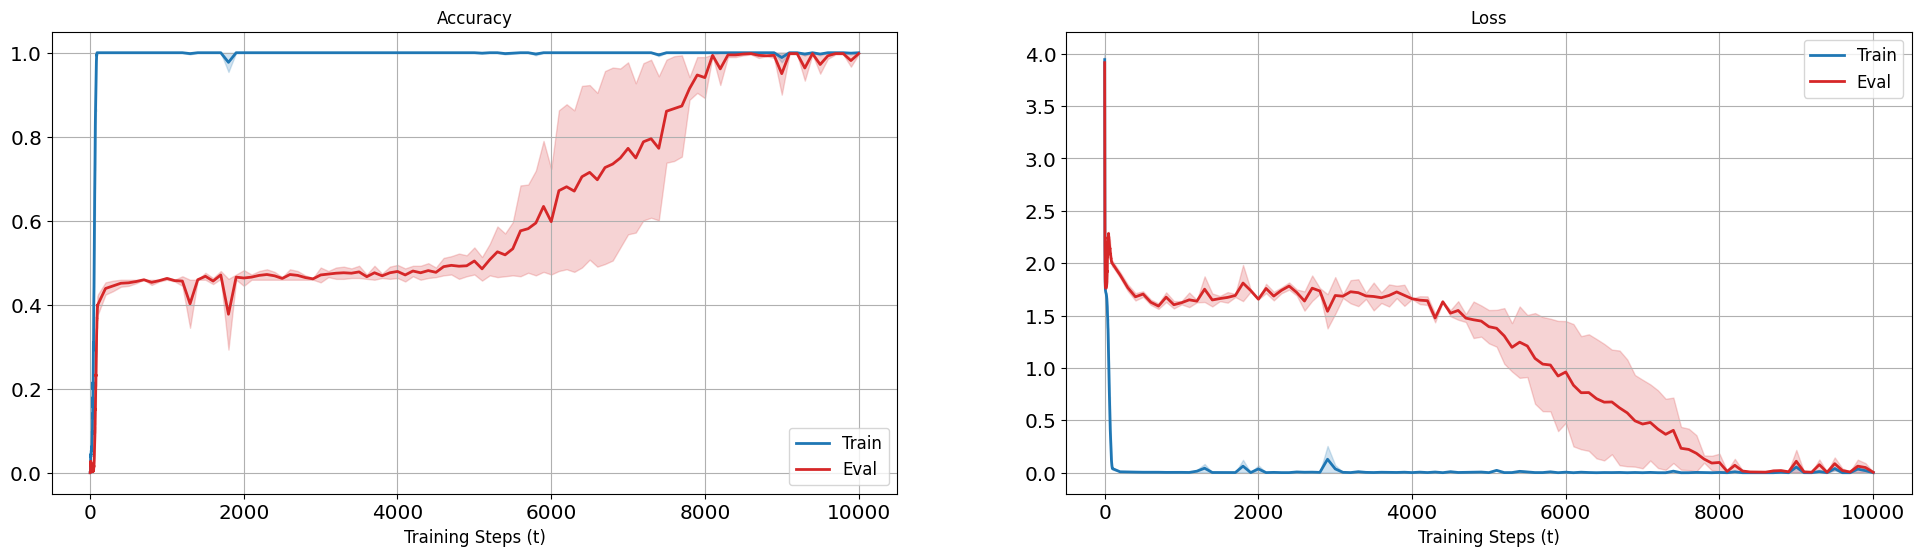

In [ ]:
import torch
from train import Arguments, train, train_m_models
from plotter import plot_loss_accs

args=Arguments()

# Data
args.p=31
args.operator = "+" # ["+", "-", "*", "/"]
args.r_train = .5
args.operation_orders = 2 # 2, 3 or [2, 3]
args.train_batch_size = 512
args.eval_batch_size = 2**12
args.num_workers = 0

# Model
args.model = 'gpt'  # [lstm, gpt]
args.num_heads = 4
args.num_layers = 2
args.embedding_size = 2**7
args.hidden_size = 2**7
args.dropout = 0.0
args.share_embeddings = False
args.bias_classifier = True

# Optimization
args.optimizer = 'adamw'  # [sgd, momentum, adam, adamw]
args.lr = 1e-3
args.weight_decay = 1e-0

# Training
args.n_steps = 10**4 + 1
args.eval_first = 10**2
args.eval_period = 10**2
args.print_step= 10**2
args.save_model_step = 10**3
args.save_statistic_step = 10**3

# Experiment & Miscellaneous
args.device = "cuda" if torch.cuda.is_available() else "cpu"
args.exp_id = 0
args.exp_name = "test"
args.log_dir = '/content/gdrive/MyDrive/"Colab Notebooks"/IFT6135_W25_A2_release/logs'
args.seed = 42
args.verbose = True



## Train multiple models (multiple seeds)
GPT_all_models_per_trials, GPT_all_metrics, all_checkpoint_paths = train_m_models(args, M=2, seeds=[0, 42])
plot_loss_accs(GPT_all_metrics, multiple_runs=True, log_x=False, log_y=False, fileName=args.exp_name, filePath=None, show=True)


In [ ]:
from checkpointing import get_extrema_performance_steps, get_extrema_performance_steps_per_trials



## For a multiple run
GPT_extrema_performances = get_extrema_performance_steps_per_trials(GPT_all_metrics)
GPT_metrics = get_extrema_performance_steps(GPT_all_metrics)


In [ ]:
print(GPT_extrema_performances)

{'min_train_loss': np.float64(0.00014710467075929046), 'min_train_loss_std': np.float64(2.2220032406039536e-05), 'min_train_loss_step': np.float64(9750.0), 'min_train_loss_step_std': np.float64(150.0), 'min_test_loss': np.float64(0.0035470747970975935), 'min_test_loss_std': np.float64(0.003084062540438026), 'min_test_loss_step': np.float64(9100.0), 'min_test_loss_step_std': np.float64(500.0), 'max_train_accuracy': np.float32(1.0), 'max_train_accuracy_std': np.float32(0.0), 'max_train_accuracy_step': np.float64(82.5), 'max_train_accuracy_step_std': np.float64(5.5), 'max_test_accuracy': np.float32(0.997921), 'max_test_accuracy_std': np.float32(0.00207901), 'max_test_accuracy_step': np.float64(8400.0), 'max_test_accuracy_step_std': np.float64(200.0), 'T_max_indexes': [202, 202]}


In [ ]:
print(GPT_metrics)

{'min_train_loss': [3.878594160079956, 2.826016902923584, 2.3036112785339355, 2.1198954582214355, 1.9433108568191528, 1.8551006317138672, 1.8099734783172607, 1.7745007276535034, 1.7530661821365356, 1.7422277927398682, 1.7362160682678223, 1.731417179107666, 1.7268632650375366, 1.7230257987976074, 1.7203341722488403, 1.718390941619873, 1.7163207530975342, 1.713569164276123, 1.71015202999115, 1.7063624858856201, 1.7023817300796509, 1.6981310844421387, 1.6933627128601074, 1.6877909898757935, 1.6813056468963623, 1.6744558811187744, 1.6656924486160278, 1.6559721231460571, 1.642246127128601, 1.6266974210739136, 1.6090940237045288, 1.5842201709747314, 1.5639145374298096, 1.5515497922897339, 1.5215650796890259, 1.5017802715301514, 1.4639275074005127, 1.447012186050415, 1.4087611436843872, 1.3957798480987549, 1.36234712600708, 1.3336565494537354, 1.3085626363754272, 1.2717336416244507, 1.2426694631576538, 1.2052961587905884, 1.1735451221466064, 1.137221097946167, 1.0942052602767944, 1.0584912300

# Getting Extrema results

In [ ]:
def format_metric(mean, std, precision=4):
    return f"${mean:.{precision}f} \\pm {std:.{precision}f}$"

def print_extrema_table(metrics_dict, model_name):
    """
    Print a LaTeX table of extrema-based performance metrics for either LSTM or GPT.

    Args:
        metrics_dict (dict): Output from get_extrema_performance_steps_per_trials.
        model_name (str): "LSTM" or "GPT".
    """
    # Compute deltas
    delta_t_L = metrics_dict["min_test_loss_step"] - metrics_dict["min_train_loss_step"]
    delta_t_A = metrics_dict["max_test_accuracy_step"] - metrics_dict["max_train_accuracy_step"]

    # Table
    print(f"\n\\textbf{{Results for {model_name.upper()}}}")
    print("\\begin{tabular}{l c}")
    print("\\toprule")
    print("Metric & Value \\\\")
    print("\\midrule")

    print(f"$\\mathcal{{L}}_{{\\text{{train}}}}$ & {format_metric(metrics_dict['min_train_loss'], metrics_dict['min_train_loss_std'])} \\\\")
    print(f"$\\mathcal{{L}}_{{\\text{{val}}}}$ & {format_metric(metrics_dict['min_test_loss'], metrics_dict['min_test_loss_std'])} \\\\")
    print(f"$\\mathcal{{A}}_{{\\text{{train}}}}$ & {format_metric(metrics_dict['max_train_accuracy'], metrics_dict['max_train_accuracy_std'])} \\\\")
    print(f"$\\mathcal{{A}}_{{\\text{{val}}}}$ & {format_metric(metrics_dict['max_test_accuracy'], metrics_dict['max_test_accuracy_std'])} \\\\")
    print(f"$t_f(\\mathcal{{L}}_{{\\text{{train}}}})$ & {format_metric(metrics_dict['min_train_loss_step'], metrics_dict['min_train_loss_step_std'])} \\\\")
    print(f"$t_f(\\mathcal{{L}}_{{\\text{{val}}}})$ & {format_metric(metrics_dict['min_test_loss_step'], metrics_dict['min_test_loss_step_std'])} \\\\")
    print(f"$t_f(\\mathcal{{A}}_{{\\text{{train}}}})$ & {format_metric(metrics_dict['max_train_accuracy_step'], metrics_dict['max_train_accuracy_step_std'])} \\\\")
    print(f"$t_f(\\mathcal{{A}}_{{\\text{{val}}}})$ & {format_metric(metrics_dict['max_test_accuracy_step'], metrics_dict['max_test_accuracy_step_std'])} \\\\")
    print(f"$\\Delta t (\\mathcal{{L}})$ & ${delta_t_L:.0f}$ \\\\")
    print(f"$\\Delta t (\\mathcal{{A}})$ & ${delta_t_A:.0f}$ \\\\")

    print("\\bottomrule")
    print("\\end{tabular}")


In [ ]:
print_extrema_table(LSTM_extrema_performances, model_name="LSTM")




\textbf{Results for LSTM}
\begin{tabular}{l c}
\toprule
Metric & Value \\
\midrule
$\mathcal{L}_{\text{train}}$ & $0.0001 \pm 0.0000$ \\
$\mathcal{L}_{\text{val}}$ & $0.0008 \pm 0.0004$ \\
$\mathcal{A}_{\text{train}}$ & $1.0000 \pm 0.0000$ \\
$\mathcal{A}_{\text{val}}$ & $1.0000 \pm 0.0000$ \\
$t_f(\mathcal{L}_{\text{train}})$ & $10001.0000 \pm 0.0000$ \\
$t_f(\mathcal{L}_{\text{val}})$ & $10001.0000 \pm 0.0000$ \\
$t_f(\mathcal{A}_{\text{train}})$ & $300.0000 \pm 0.0000$ \\
$t_f(\mathcal{A}_{\text{val}})$ & $7850.0000 \pm 350.0000$ \\
$\Delta t (\mathcal{L})$ & $0$ \\
$\Delta t (\mathcal{A})$ & $7550$ \\
\bottomrule
\end{tabular}


In [ ]:
print_extrema_table(GPT_extrema_performances, model_name="GPT")


\textbf{Results for GPT}
\begin{tabular}{l c}
\toprule
Metric & Value \\
\midrule
$\mathcal{L}_{\text{train}}$ & $0.0001 \pm 0.0000$ \\
$\mathcal{L}_{\text{val}}$ & $0.0035 \pm 0.0031$ \\
$\mathcal{A}_{\text{train}}$ & $1.0000 \pm 0.0000$ \\
$\mathcal{A}_{\text{val}}$ & $0.9979 \pm 0.0021$ \\
$t_f(\mathcal{L}_{\text{train}})$ & $9750.0000 \pm 150.0000$ \\
$t_f(\mathcal{L}_{\text{val}})$ & $9100.0000 \pm 500.0000$ \\
$t_f(\mathcal{A}_{\text{train}})$ & $82.5000 \pm 5.5000$ \\
$t_f(\mathcal{A}_{\text{val}})$ & $8400.0000 \pm 200.0000$ \\
$\Delta t (\mathcal{L})$ & $-650$ \\
$\Delta t (\mathcal{A})$ & $8318$ \\
\bottomrule
\end{tabular}


In [7]:
batch_sizes = [i for i in range(6, 9)]
print(batch_sizes)

[6, 7, 8]
